In [1]:
import pandas as pd
from db_utils import RDSDatabaseConnector, LocalDataLoader

def load_data():
    rds_connector = RDSDatabaseConnector()
    credentials = rds_connector.load_database_credentials()

    query = "SELECT * FROM loan_payments"
    data_df = rds_connector.extract_data_as_dataframe(query)

    file_path = "loan_payments_data.csv"  # Consider using a more dynamic file path
    rds_connector.save_data_to_csv(data_df, file_path)

    loaded_data = LocalDataLoader.load_data_from_csv(file_path)

    return loaded_data

# Run the function
data = load_data()
data.head()

Data saved to loan_payments_data.csv successfully.


id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date last_payment_amount  \
0                     0.0           Jan-2022              248.82   
1                     0.0           Jan-2022              407.52   
2                     0.0           Oct-2021            12850.16   
3                     0.0           Jun-2021            13899.67   
4                     0.0           Jan-2022              456.54   

  next_payment_date last_credit_pull_date collections_12_mths_ex_med  \
0          Feb-2022              Jan-2022                        0.0   
1          Feb-2022              Jan-2022                        0.0   
2               NaN              Oct-2021                        0.0   
3               NaN              Jun-2021                        0.0   
4          Feb-2022              Jan-2022                        0.0   

  mths_since_last_major_derog  policy_code  application_type  
0                         5.0            1        INDIVIDUAL  
1                         NaN            1        INDIVIDUAL  
2                         NaN            1        INDIVIDUAL  
3                         NaN            1        INDIVIDUAL  
4                         NaN            1        INDIVIDUAL  

[5 rows x 43 columns]

In [2]:
# Section 3: Apply Data Transformations
from db_utils import DataTransform

def apply_data_transformations(data):
    transformer = DataTransform()
    numeric_columns = ['loan_amount', 'funded_amount', 'annual_inc', 'dti']
    date_columns = ['issue_date', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']
    data = transformer.convert_to_numeric(data, numeric_columns)
    data = transformer.convert_to_datetime(data, date_columns)

    return data

# Run the function
transformed_data = apply_data_transformations(data)
transformed_data.head()

id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0  38676116   41461848         8000         8000.0             8000.0   
1  38656203   41440010        13200        13200.0            13200.0   
2  38656154   41439961        16000        16000.0            16000.0   
3  38656128   41439934        15000        15000.0            15000.0   
4  38656121   41439927        15000        15000.0            15000.0   

        term  int_rate  instalment grade sub_grade  ... recoveries  \
0  36 months      7.49      248.82     A        A4  ...        0.0   
1  36 months      6.99      407.52     A        A3  ...        0.0   
2  36 months      7.49      497.63     A        A4  ...        0.0   
3  36 months     14.31      514.93     C        C4  ...        0.0   
4  36 months      6.03      456.54     A        A1  ...        0.0   

  collection_recovery_fee  last_payment_date last_payment_amount  \
0                     0.0         2022-01-01              248.82   
1                     0.0         2022-01-01              407.52   
2                     0.0         2021-10-01            12850.16   
3                     0.0         2021-06-01            13899.67   
4                     0.0         2022-01-01              456.54   

  next_payment_date last_credit_pull_date collections_12_mths_ex_med  \
0        2022-02-01            2022-01-01                        0.0   
1        2022-02-01            2022-01-01                        0.0   
2               NaT            2021-10-01                        0.0   
3               NaT            2021-06-01                        0.0   
4        2022-02-01            2022-01-01                        0.0   

  mths_since_last_major_derog  policy_code  application_type  
0                         5.0            1        INDIVIDUAL  
1                         NaN            1        INDIVIDUAL  
2                         NaN            1        INDIVIDUAL  
3                         NaN            1        INDIVIDUAL  
4                         NaN            1        INDIVIDUAL  

[5 rows x 43 columns]

In [3]:
# Section 4: Display Column Information
def display_column_info(df, column):
    """
    Display information about a specific column.

    Parameters:
    - df: DataFrame
    - column: str, column name

    Prints:
    - Data type, number of unique values, and top 5 values in the specified column.
    """
    print(f"Column: {column}")
    print(f"Data Type: {df[column].dtype}")
    print(f"Number of Unique Values: {df[column].nunique()}")
    print(f"Top 5 Values: {df[column].value_counts().head().index.tolist()}")

# Run the function
display_column_info(transformed_data, 'loan_amount')

Column: loan_amount
Data Type: int64
Number of Unique Values: 1083
Top 5 Values: [10000, 12000, 15000, 20000, 5000]


DataFrame Shape: (54231, 43)
DataFrame Shape: (54231, 43)


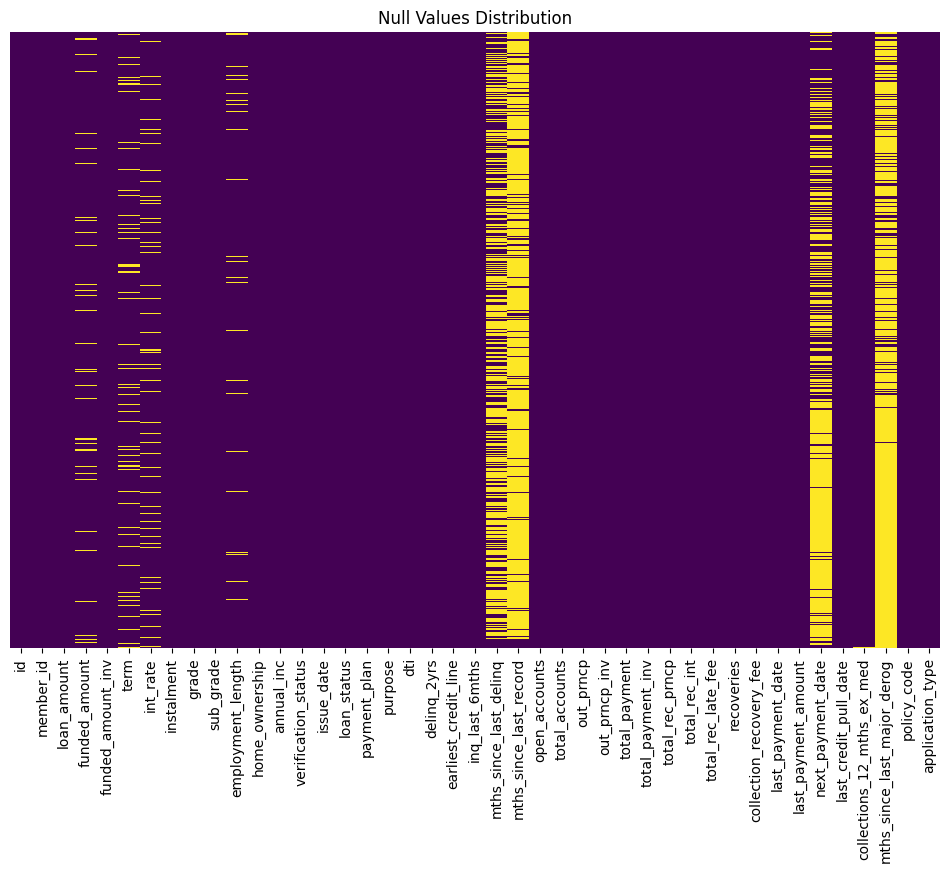

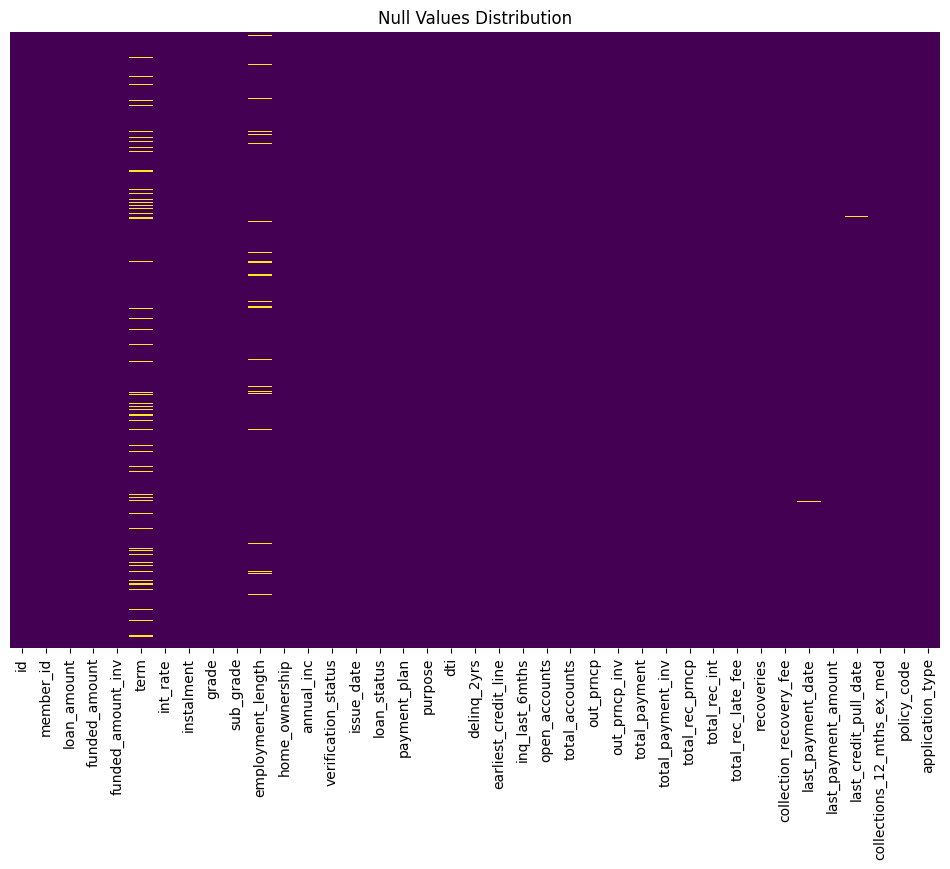

In [4]:
from db_utils import RDSDatabaseConnector, LocalDataLoader, DataFrameInfo, DataTransform,Plotter,DataFrameTransform


# Load data from the database
rds_connector = RDSDatabaseConnector()
query = "SELECT * FROM loan_payments"  # Replace with your actual table name
data_df = rds_connector.extract_data_as_dataframe(query)

# Display basic information about the DataFrame
DataFrameInfo.describe_columns(data_df)
DataFrameInfo.print_shape(data_df)

# Extract statistical values
DataFrameInfo.extract_statistics(data_df)

# Count distinct values in categorical columns
DataFrameInfo.count_distinct_values(data_df)

DataFrameInfo.count_null_values(data_df)

df = pd.read_csv("loan_payments_data.csv")

# Create an instance of DataFrameInfo
df_info = DataFrameInfo()

# Example usage
df_info.describe_columns(df)
df_info.extract_statistics(df)
df_info.count_distinct_values(df)
df_info.print_shape(df)
df_info.count_null_values(df)

# Instantiate the classes
transformer = DataFrameTransform()

# Assuming you have loaded your DataFrame 'df' before this point
# Plot NULL distribution
Plotter.plot_null_distribution(df)

# Drop columns with a high percentage of NULLs
df = transformer.drop_columns_with_nulls(df)

# Impute missing values
df = transformer.impute_missing_values(df)

# Plot NULL distribution after imputation
Plotter.plot_null_distribution(df)




<Figure size 20x10 with 0 Axes>

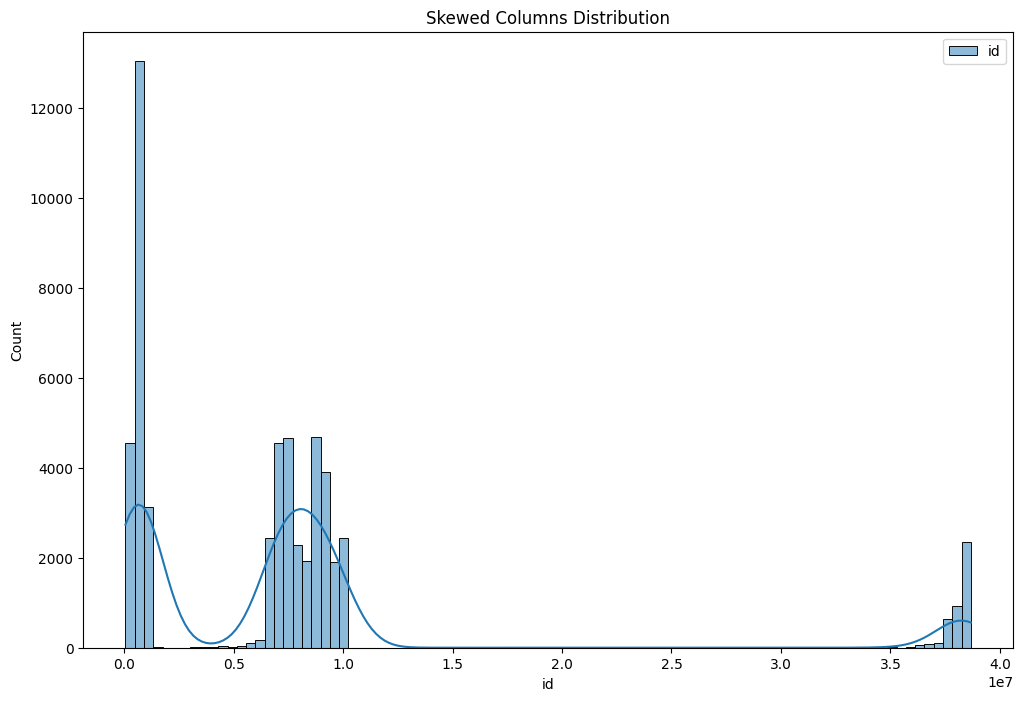

<Figure size 20x10 with 0 Axes>

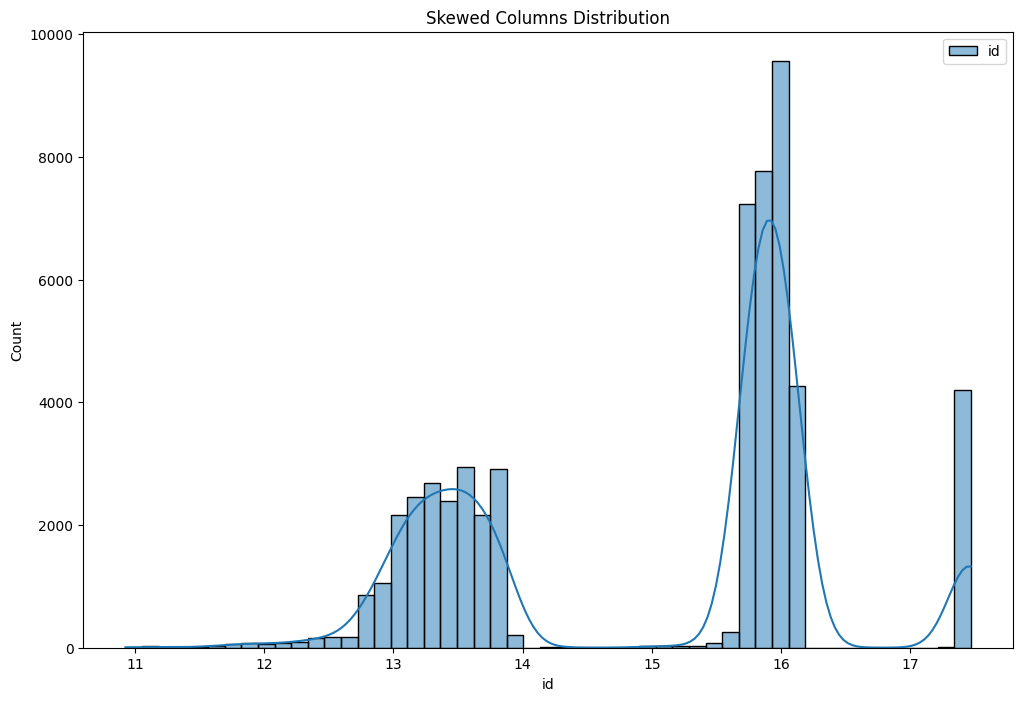

<Figure size 20x10 with 0 Axes>

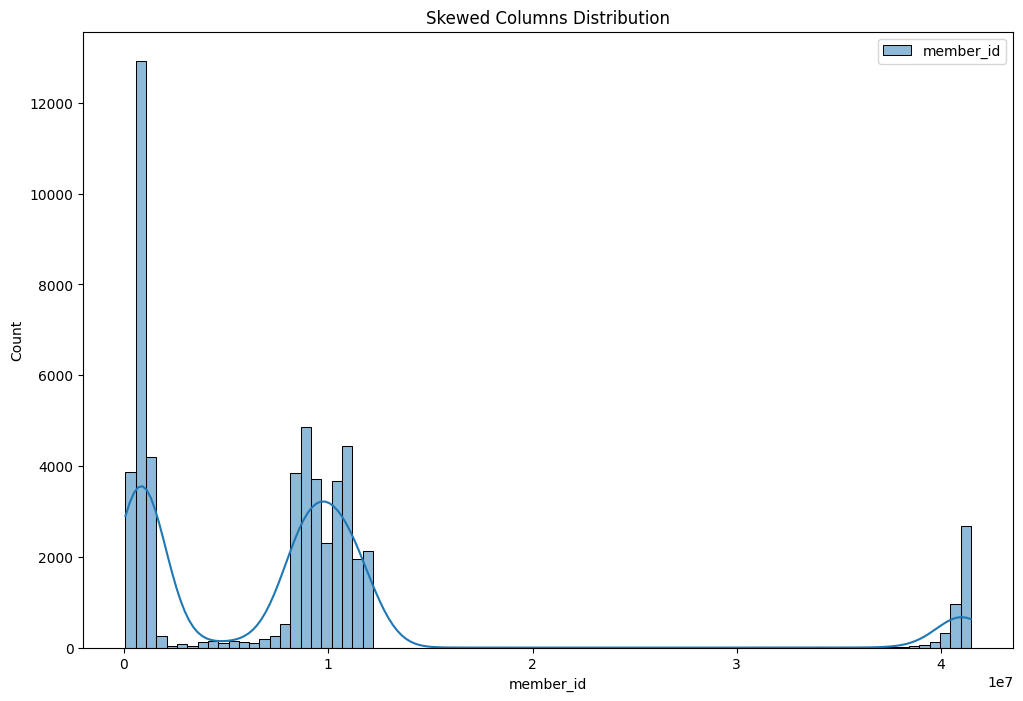

<Figure size 20x10 with 0 Axes>

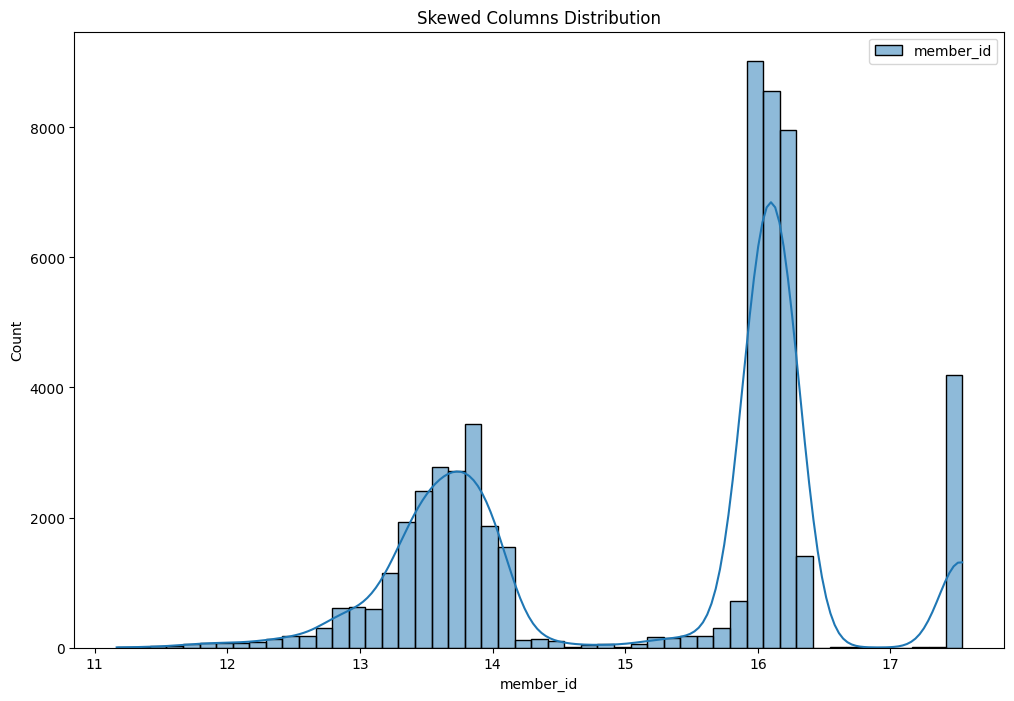

<Figure size 20x10 with 0 Axes>

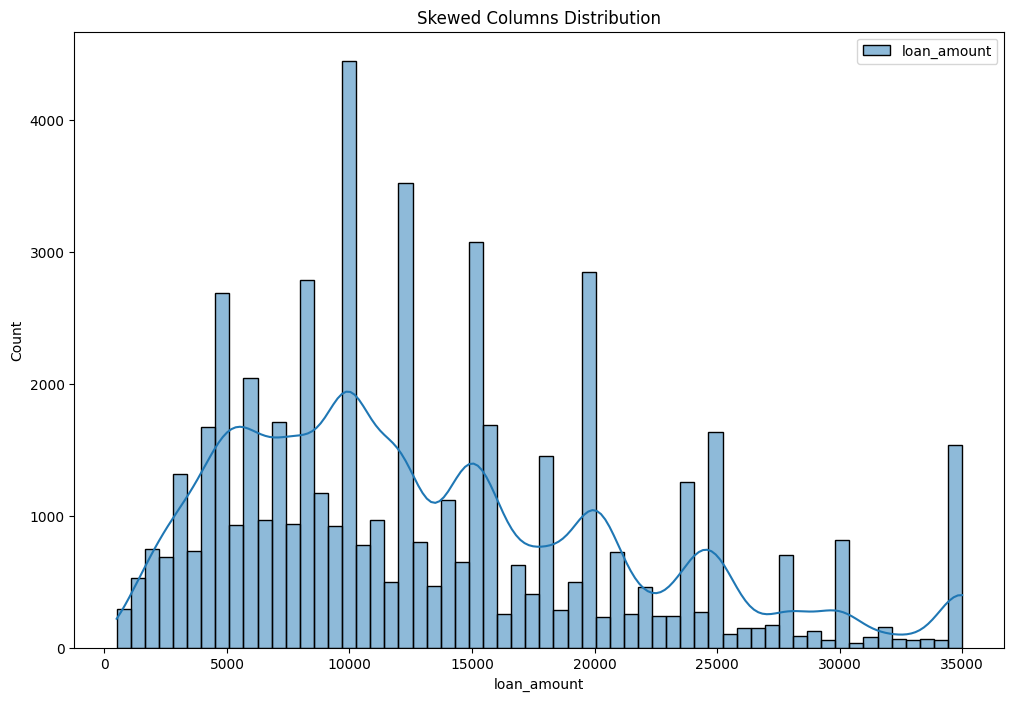

<Figure size 20x10 with 0 Axes>

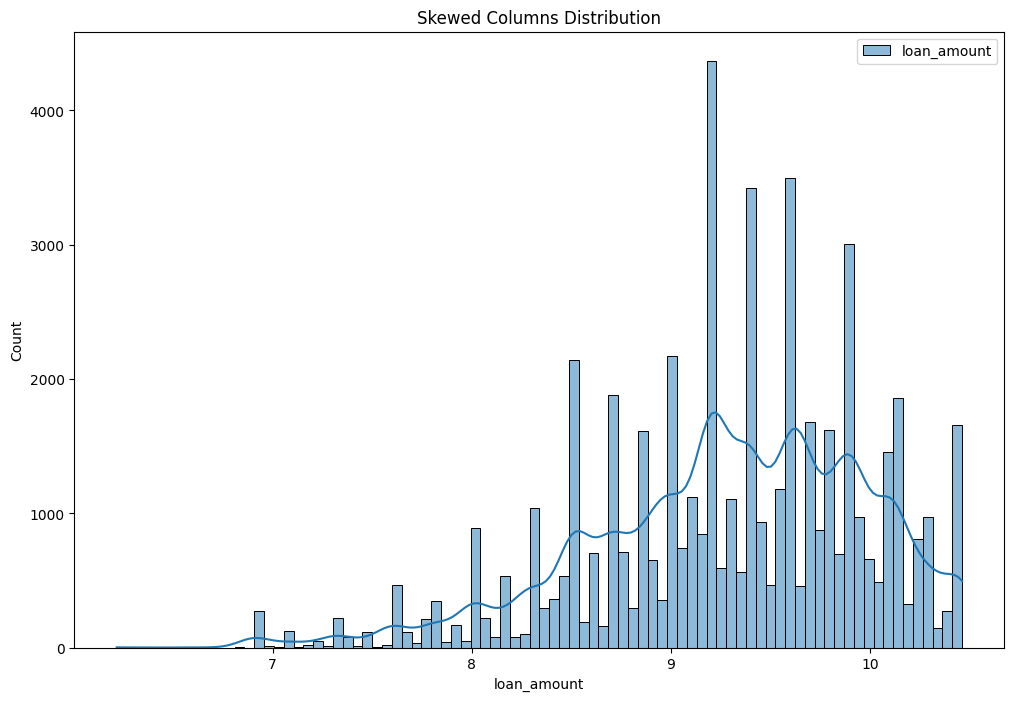

<Figure size 20x10 with 0 Axes>

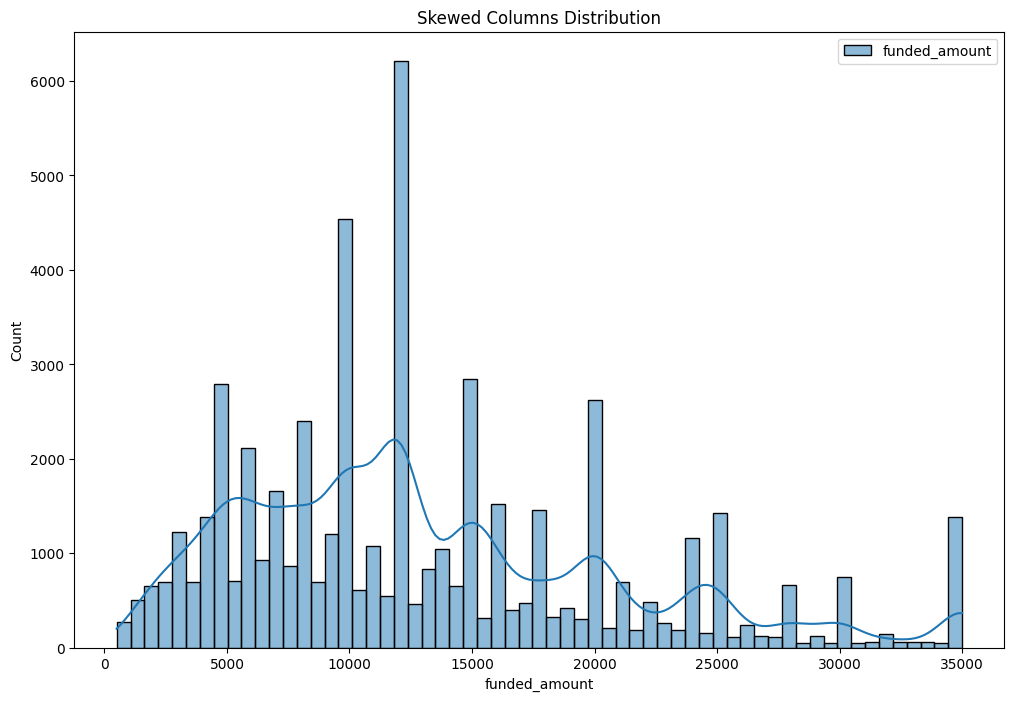

<Figure size 20x10 with 0 Axes>

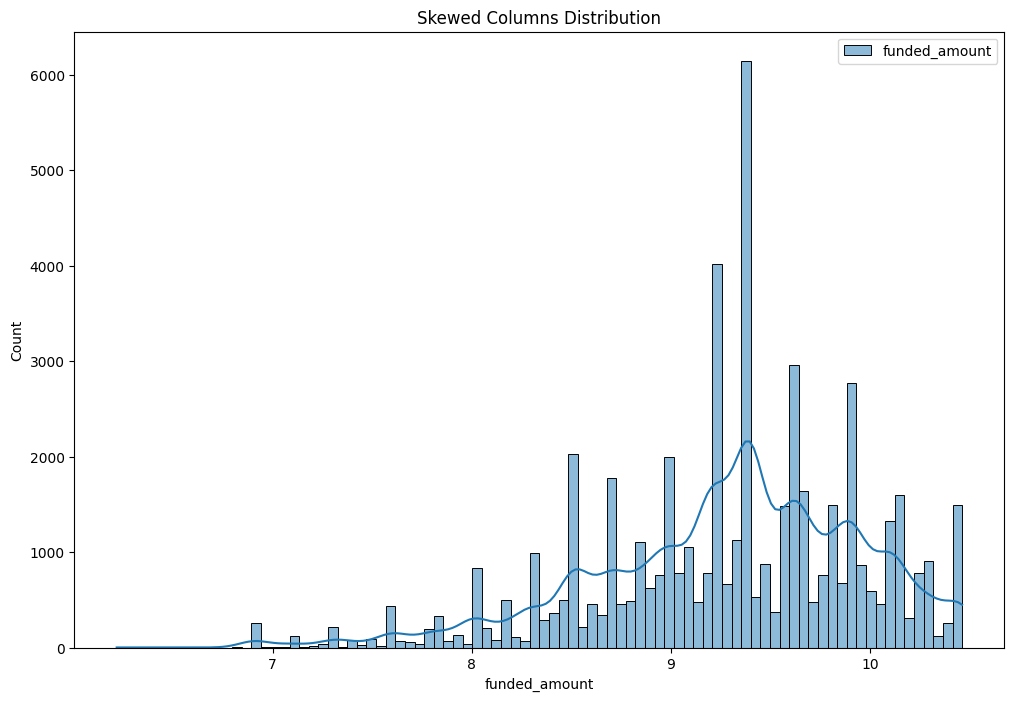

<Figure size 20x10 with 0 Axes>

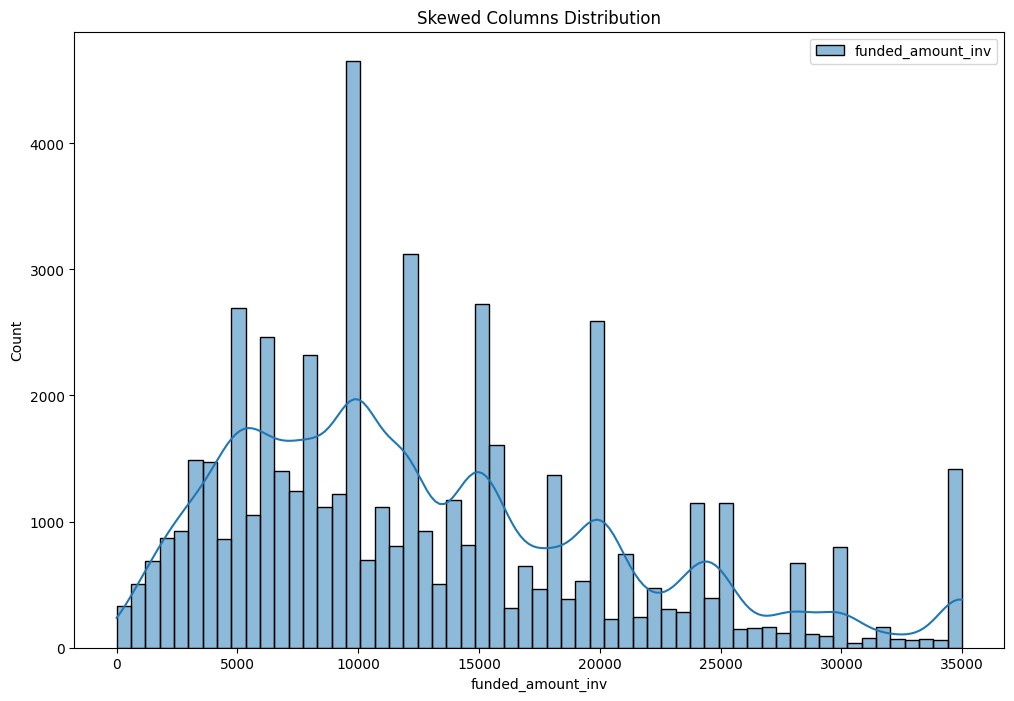

<Figure size 20x10 with 0 Axes>

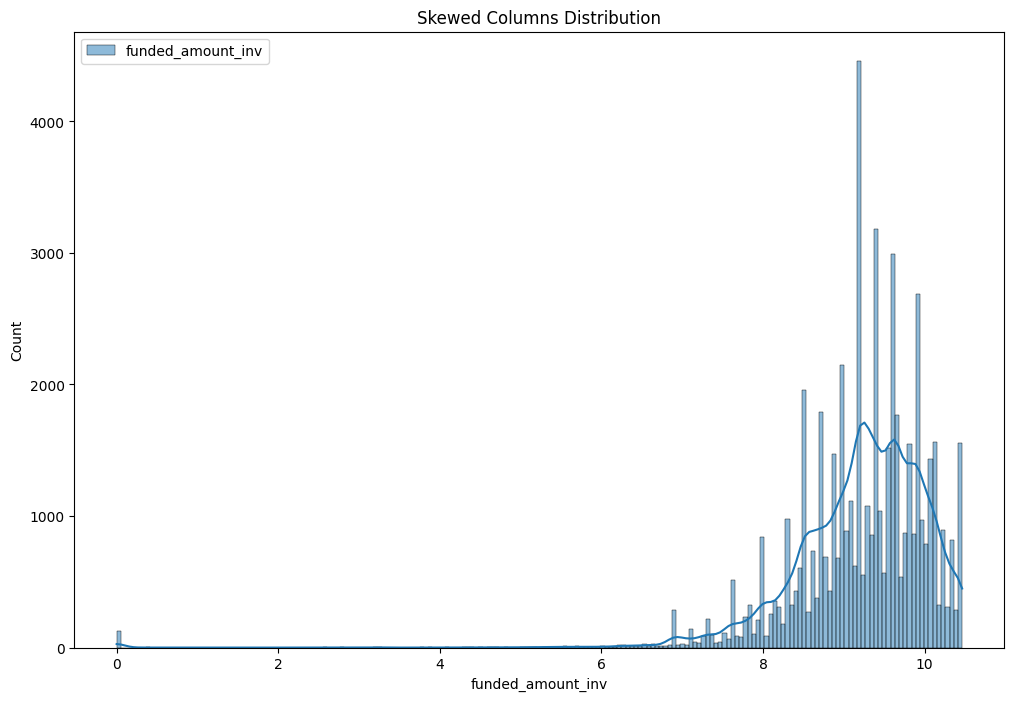

<Figure size 20x10 with 0 Axes>

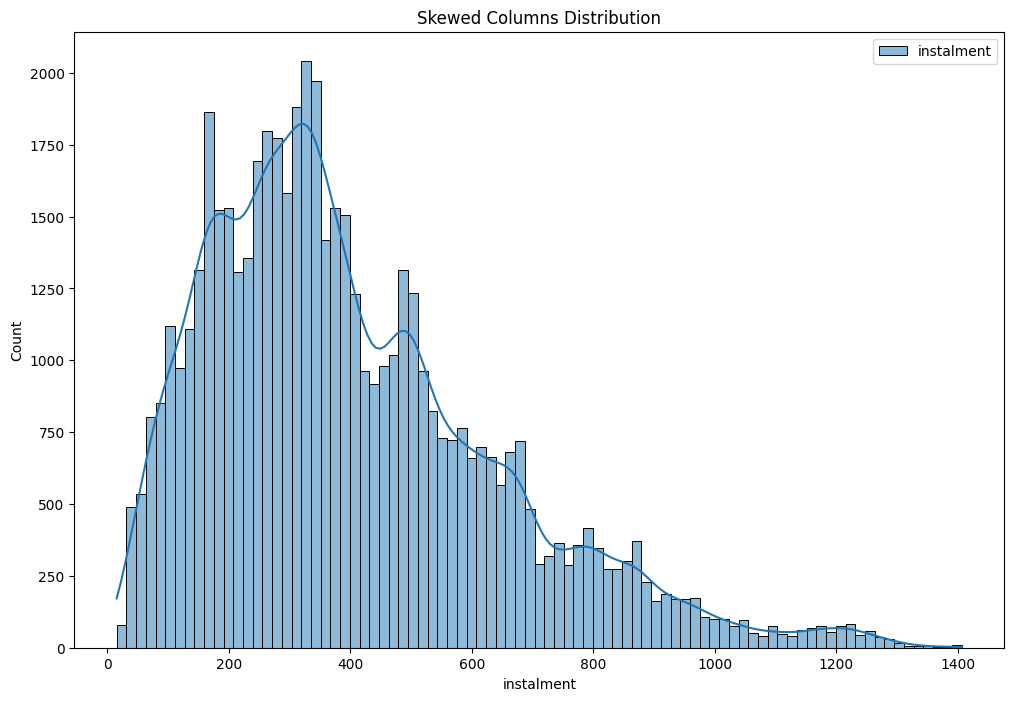

<Figure size 20x10 with 0 Axes>

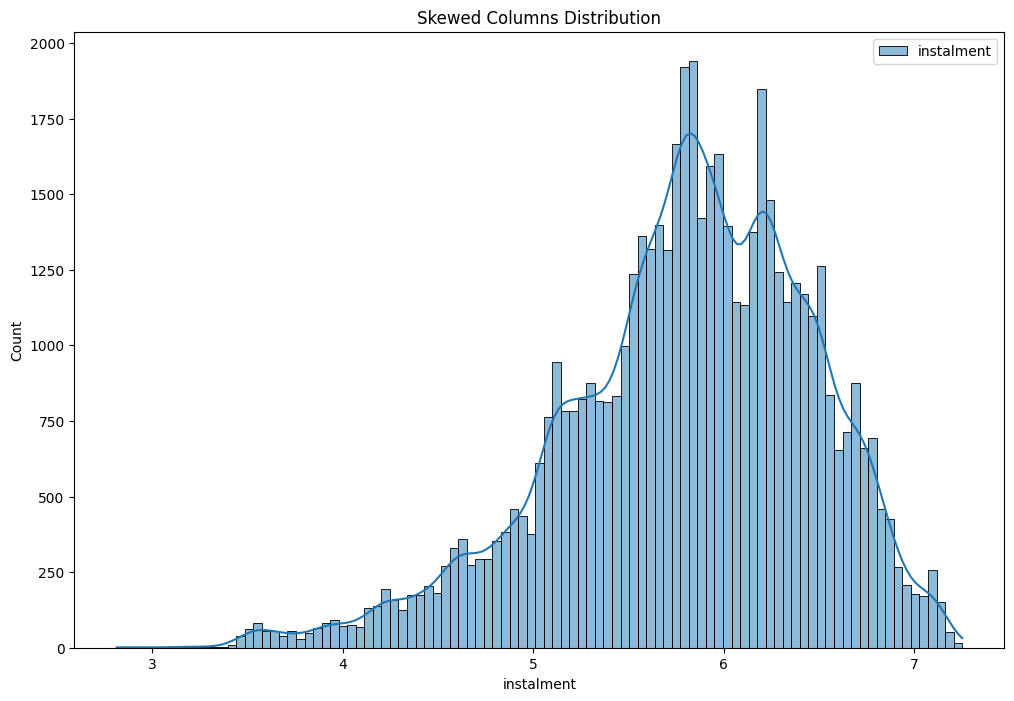

<Figure size 20x10 with 0 Axes>

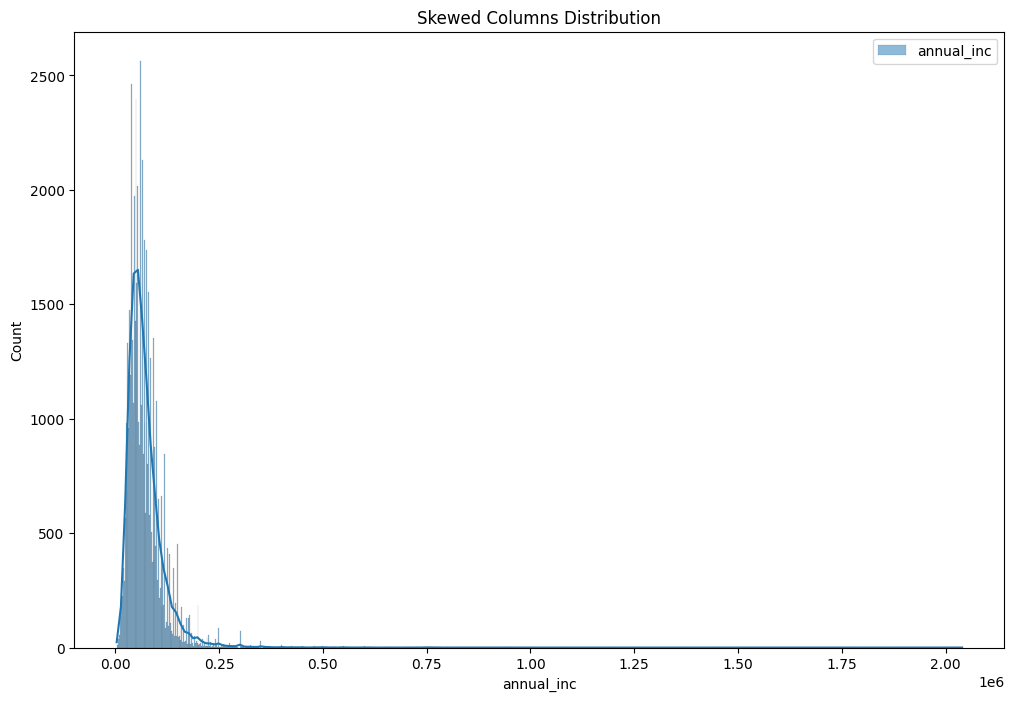

<Figure size 20x10 with 0 Axes>

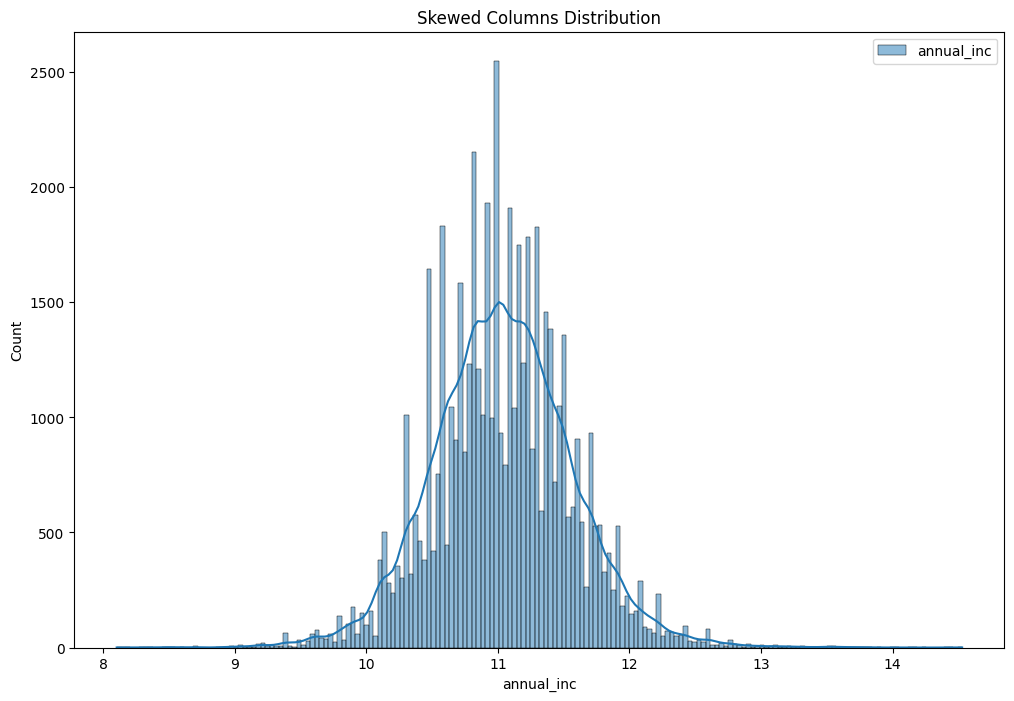

<Figure size 20x10 with 0 Axes>

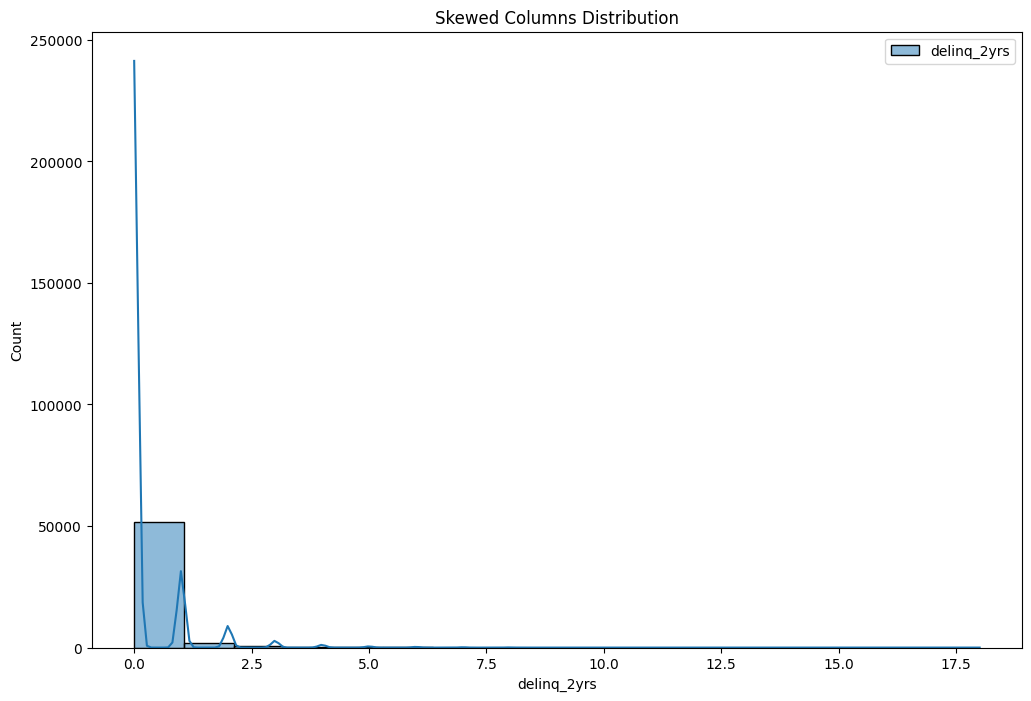

<Figure size 20x10 with 0 Axes>

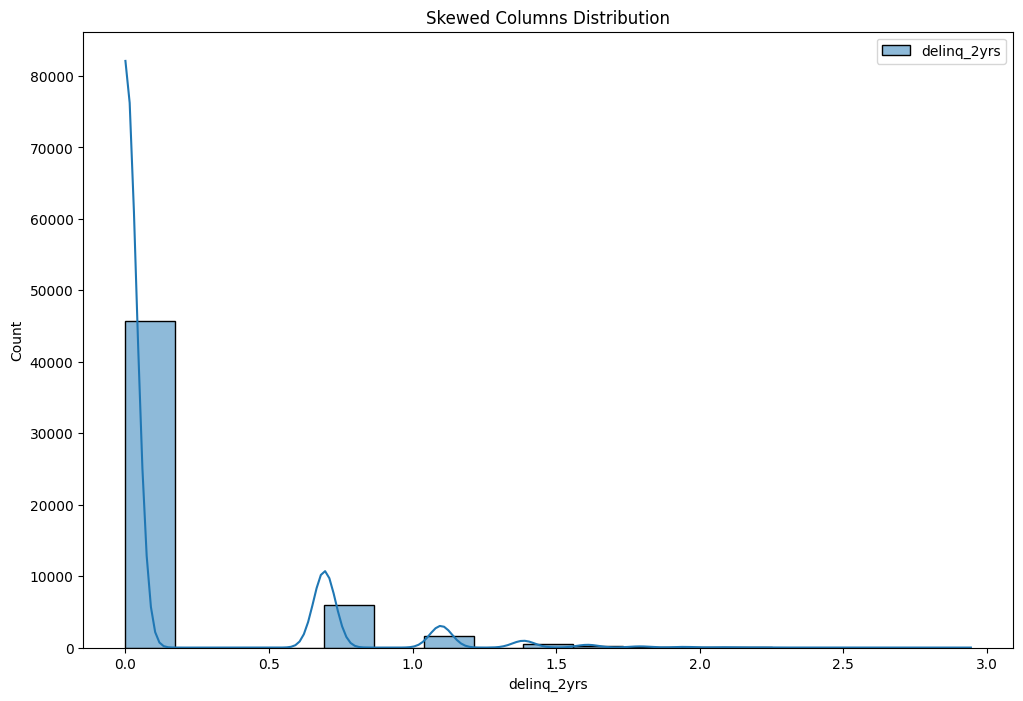

<Figure size 20x10 with 0 Axes>

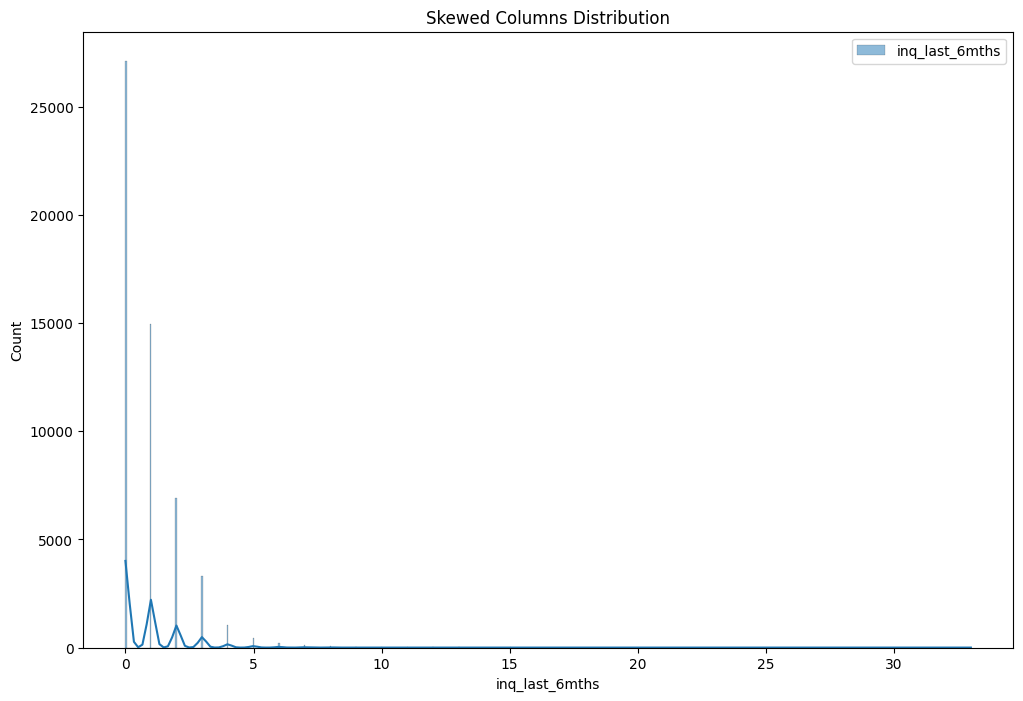

<Figure size 20x10 with 0 Axes>

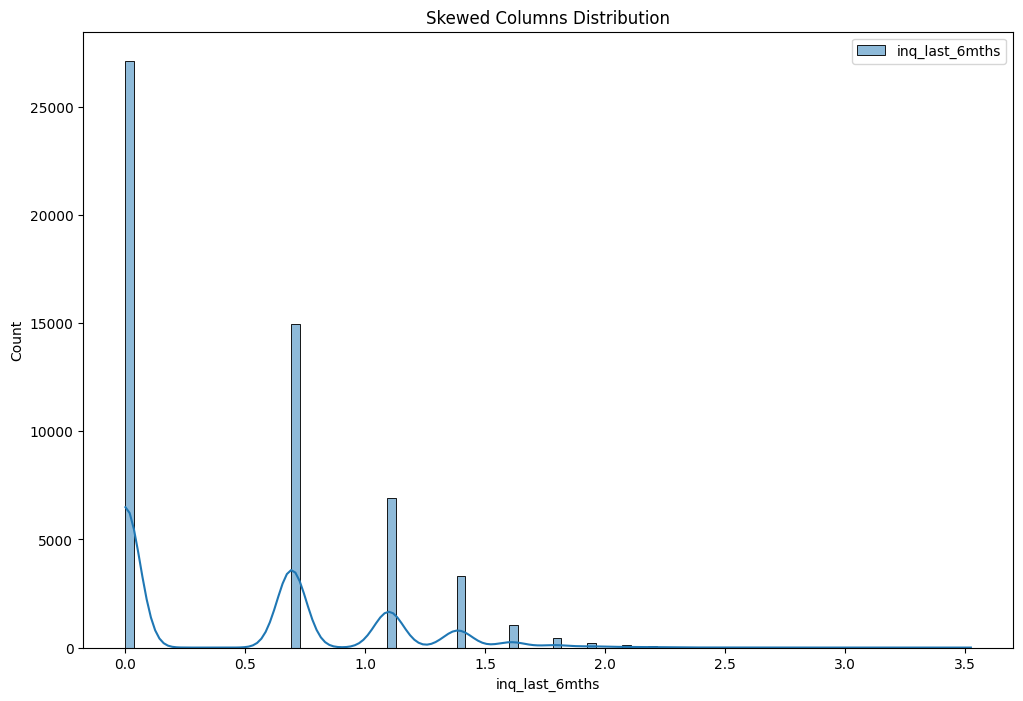

<Figure size 20x10 with 0 Axes>

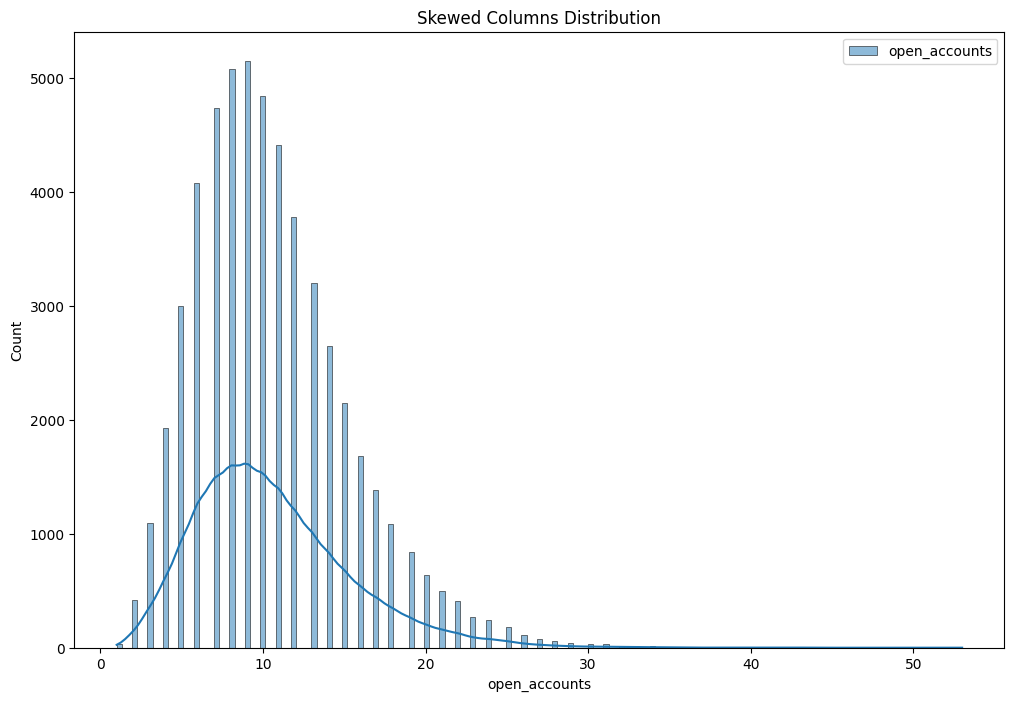

<Figure size 20x10 with 0 Axes>

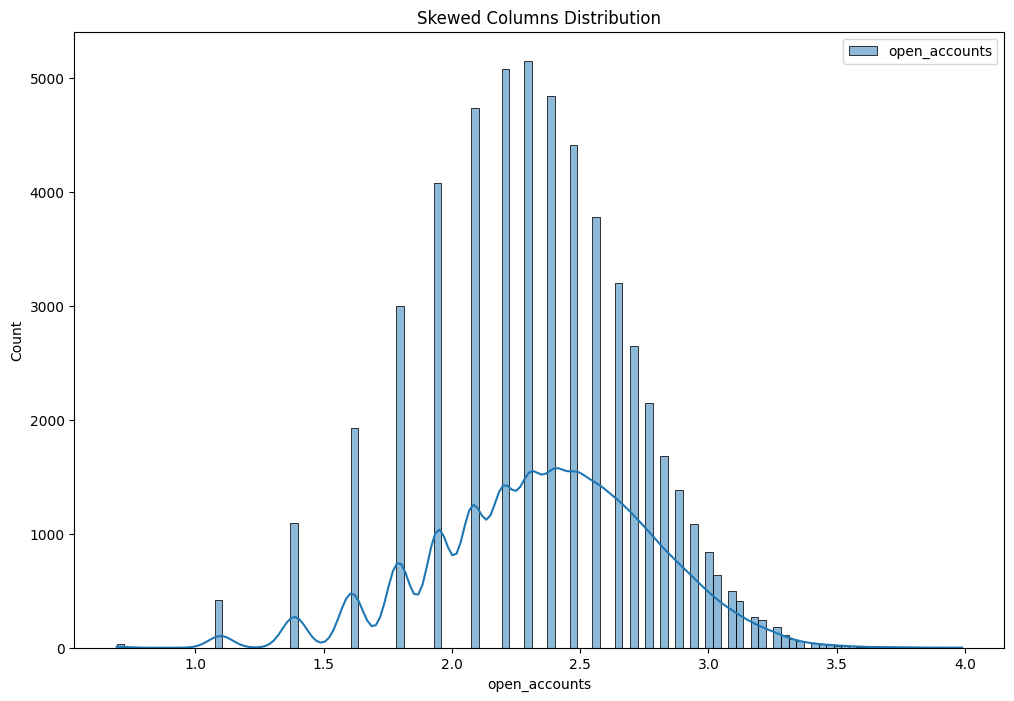

<Figure size 20x10 with 0 Axes>

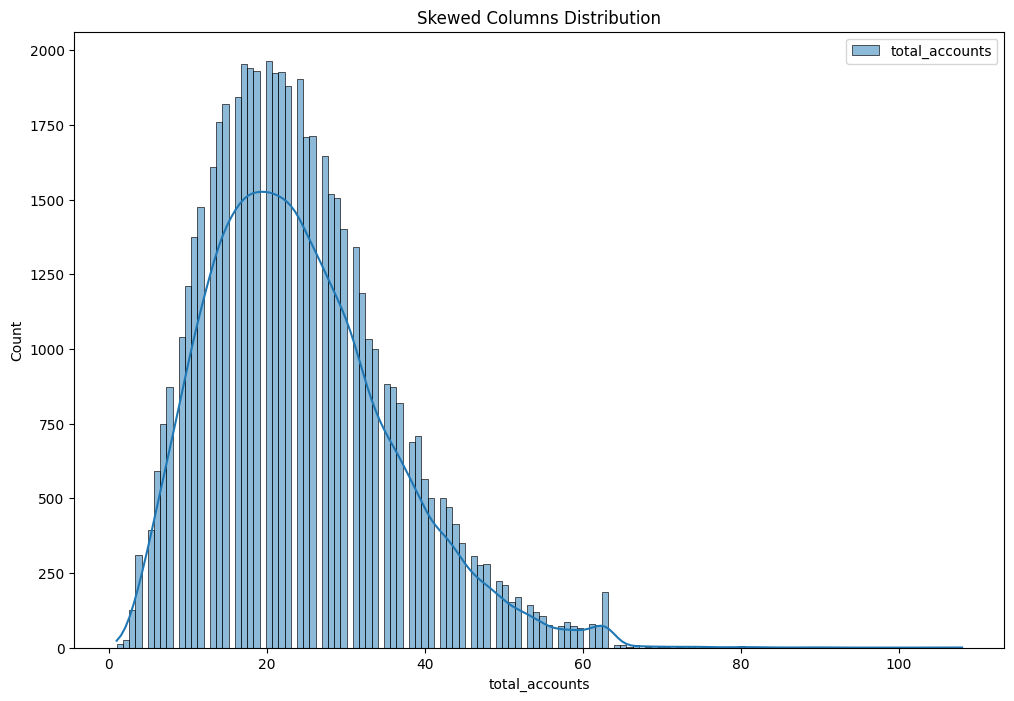

<Figure size 20x10 with 0 Axes>

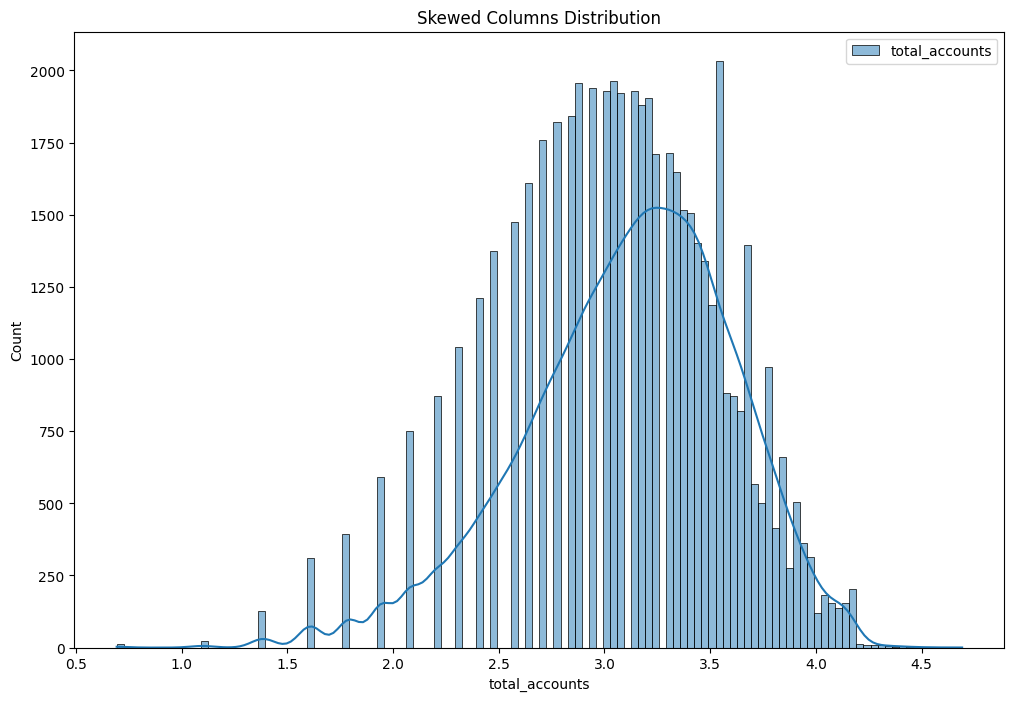

<Figure size 20x10 with 0 Axes>

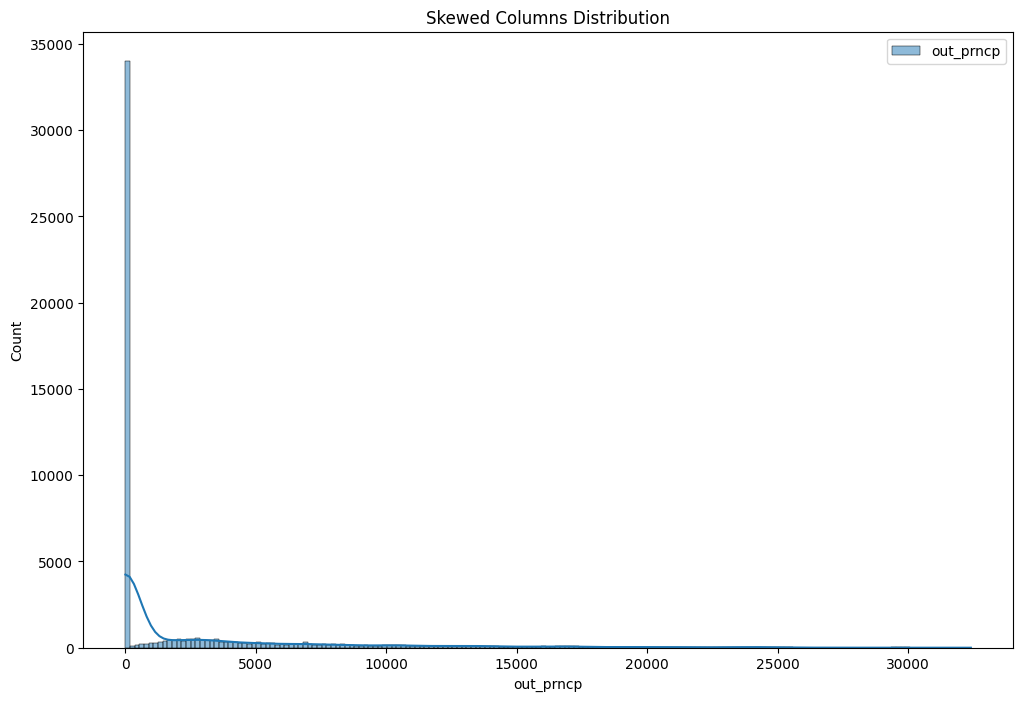

<Figure size 20x10 with 0 Axes>

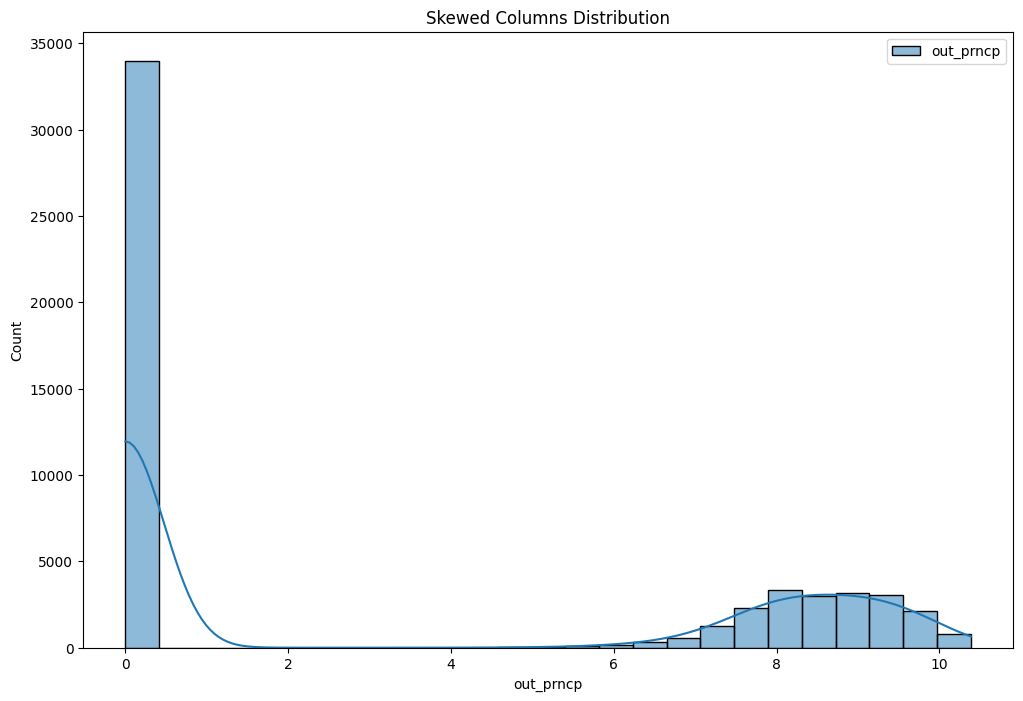

<Figure size 20x10 with 0 Axes>

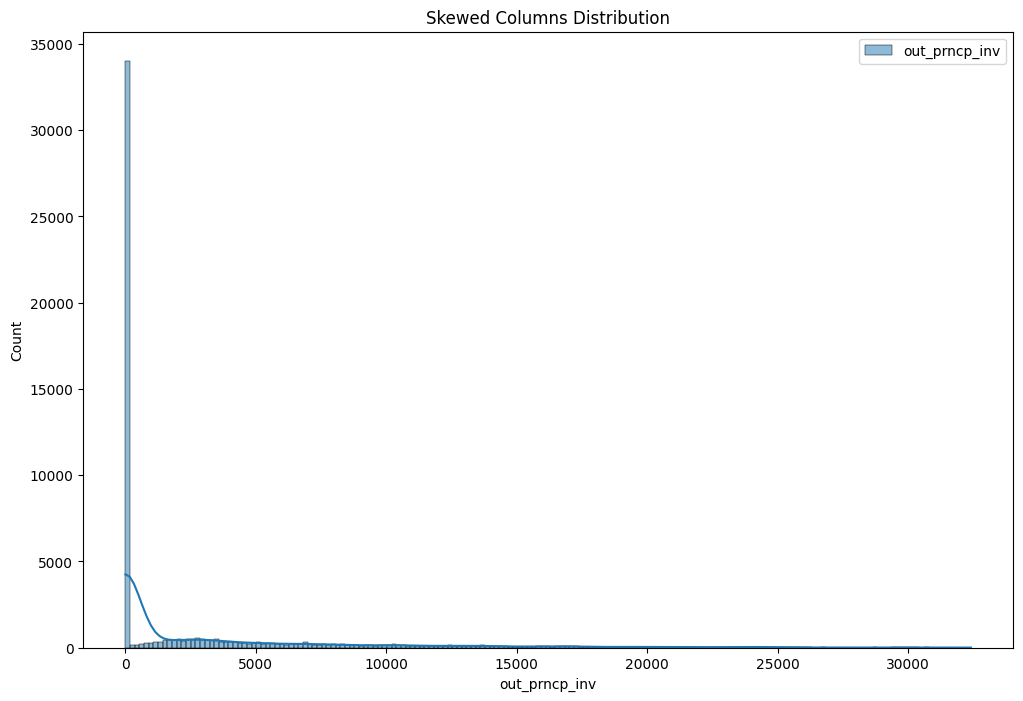

<Figure size 20x10 with 0 Axes>

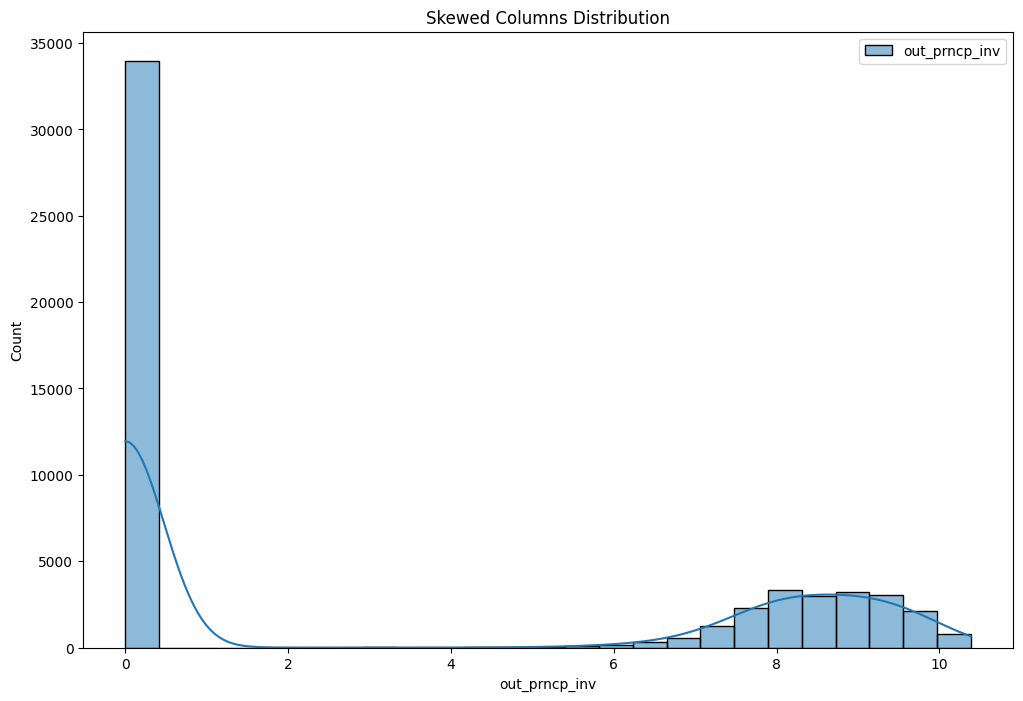

<Figure size 20x10 with 0 Axes>

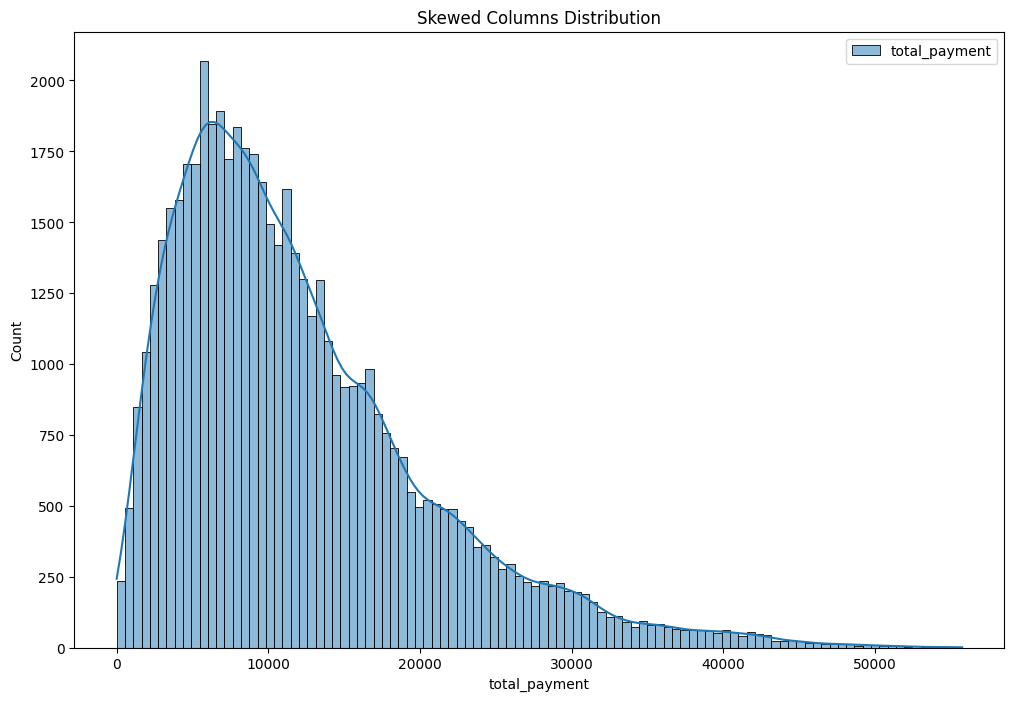

<Figure size 20x10 with 0 Axes>

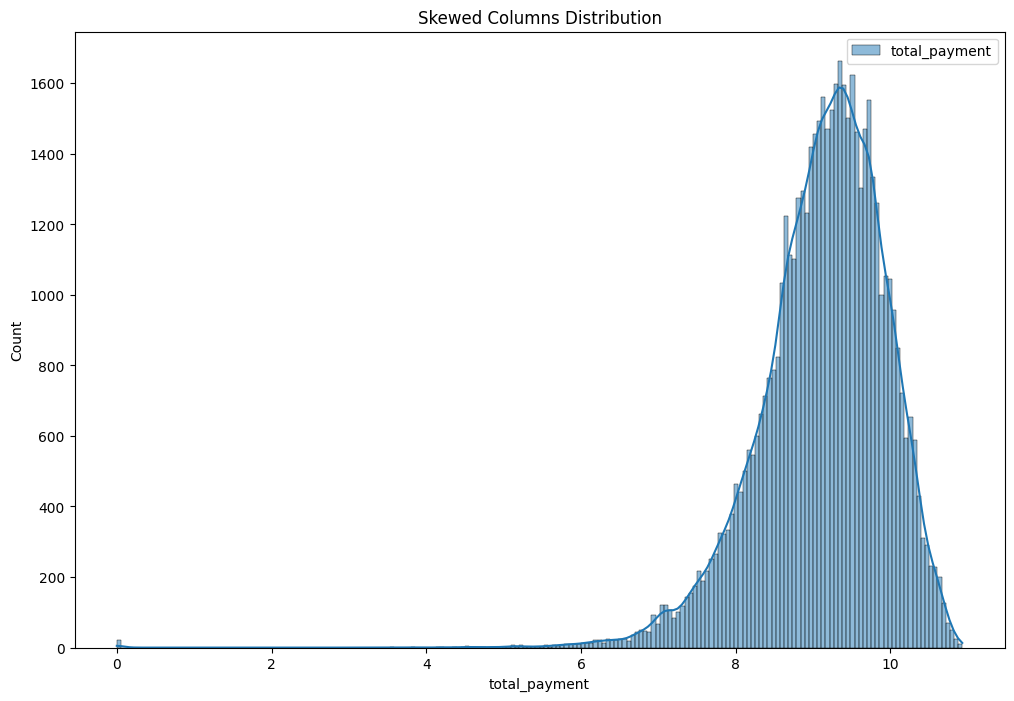

<Figure size 20x10 with 0 Axes>

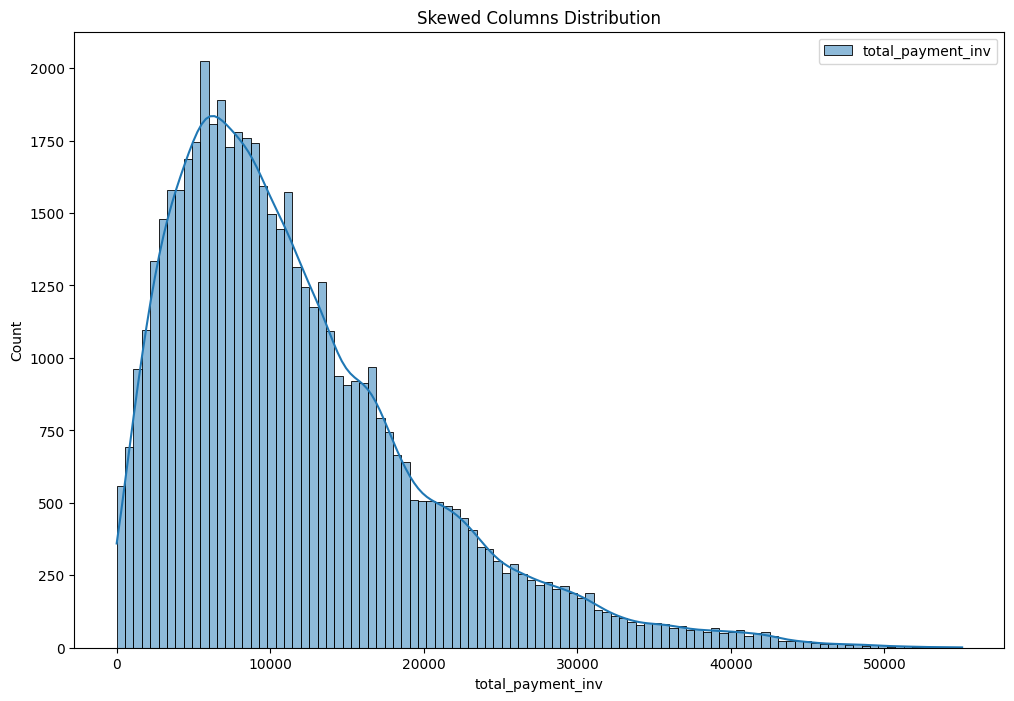

<Figure size 20x10 with 0 Axes>

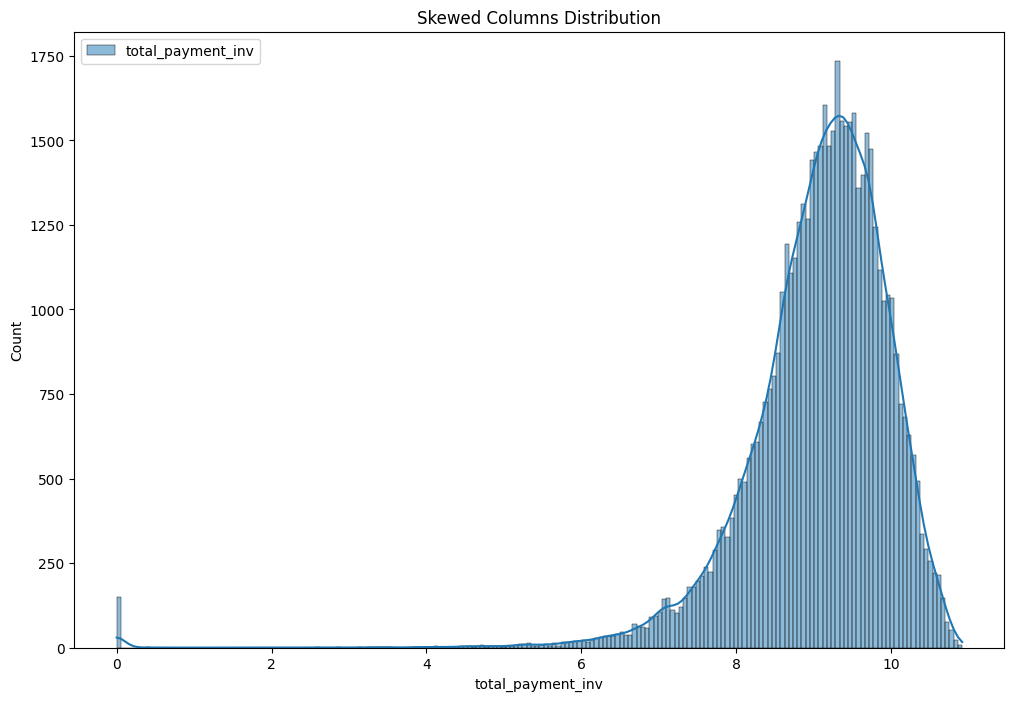

<Figure size 20x10 with 0 Axes>

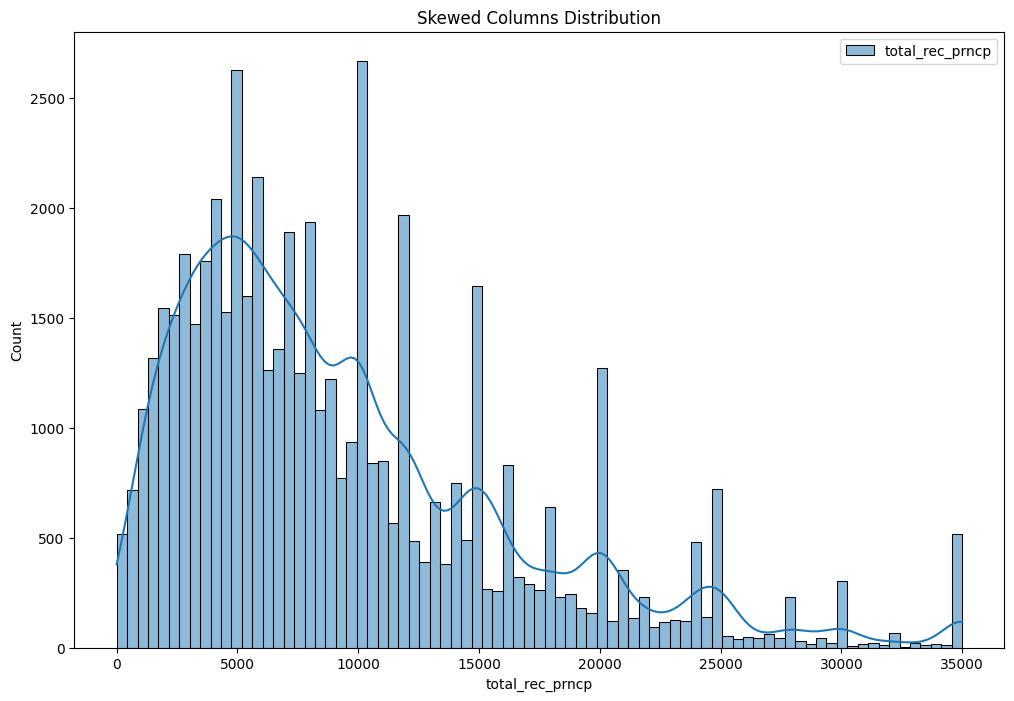

<Figure size 20x10 with 0 Axes>

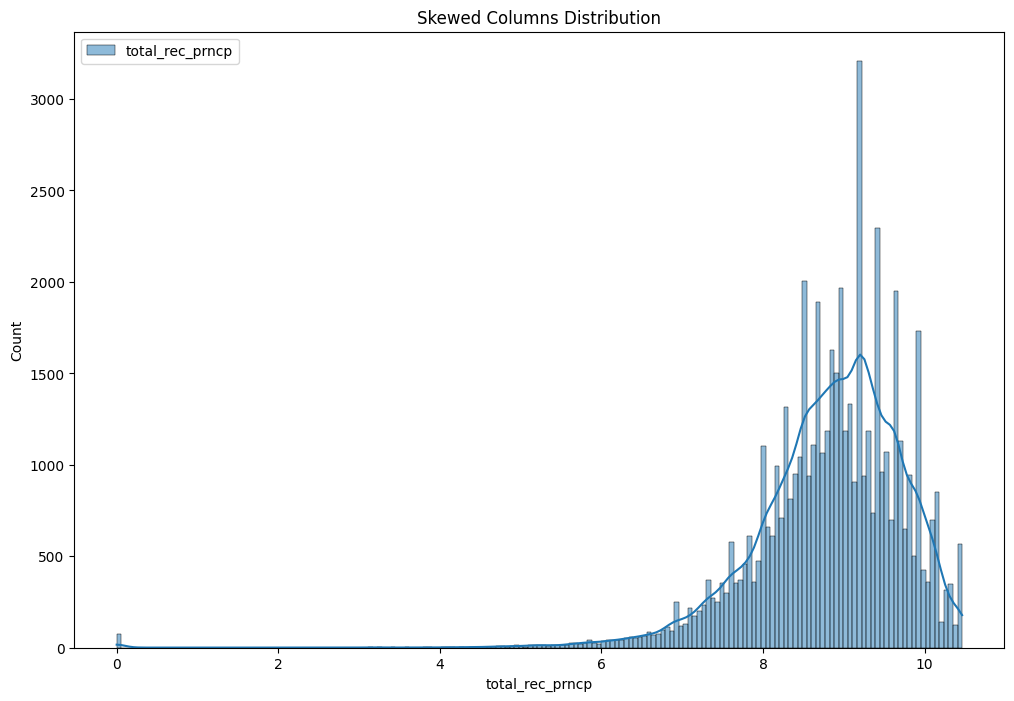

<Figure size 20x10 with 0 Axes>

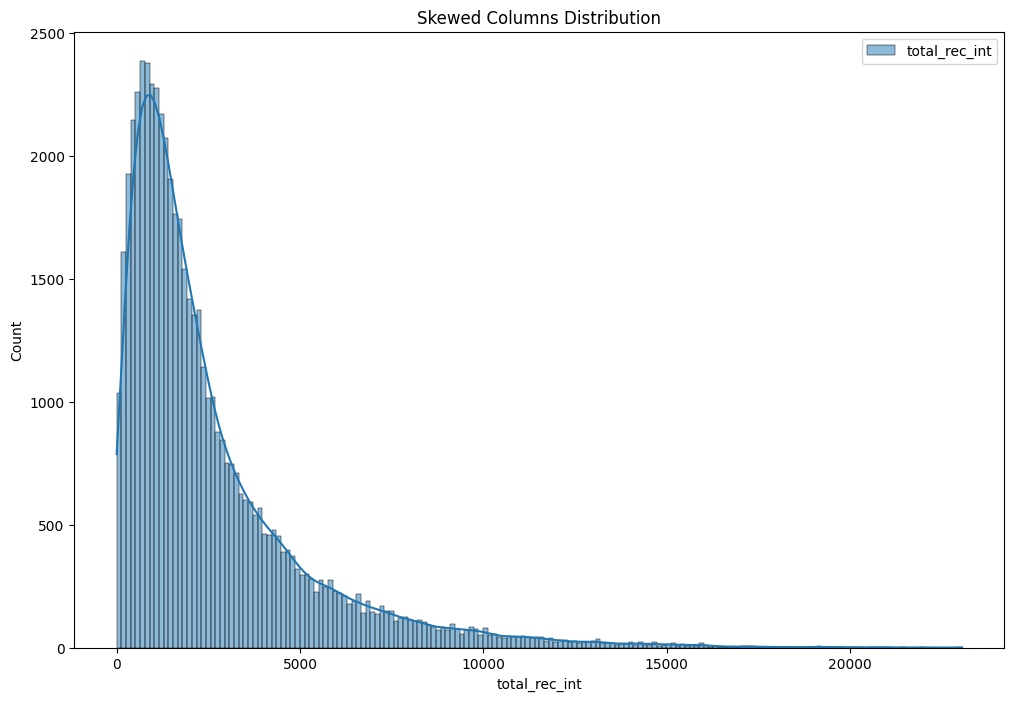

<Figure size 20x10 with 0 Axes>

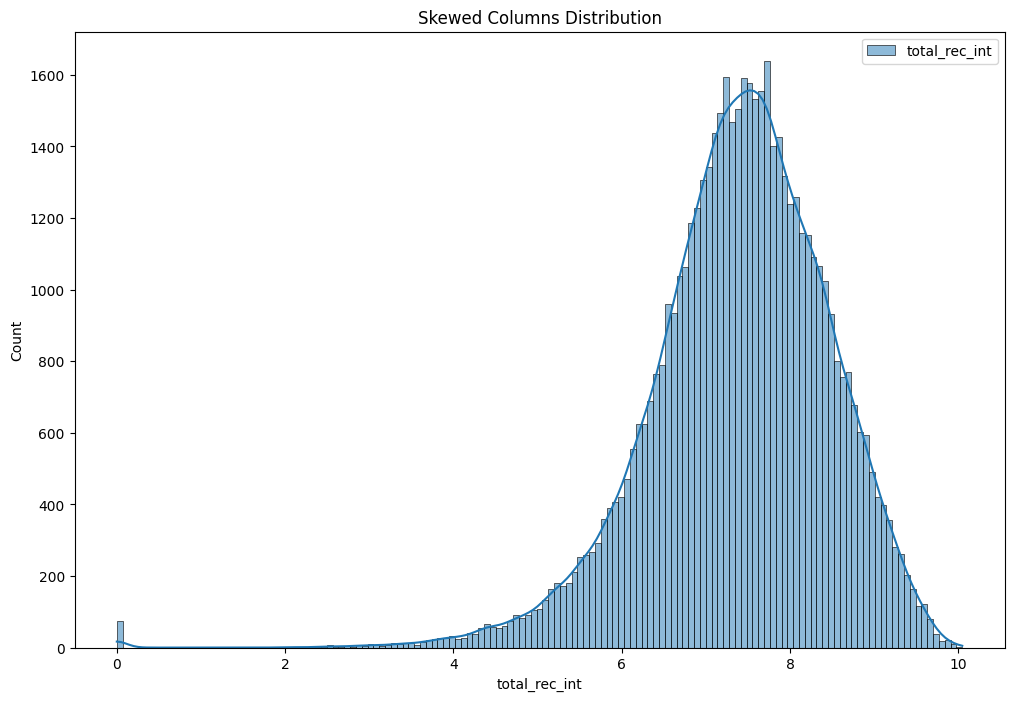

<Figure size 20x10 with 0 Axes>

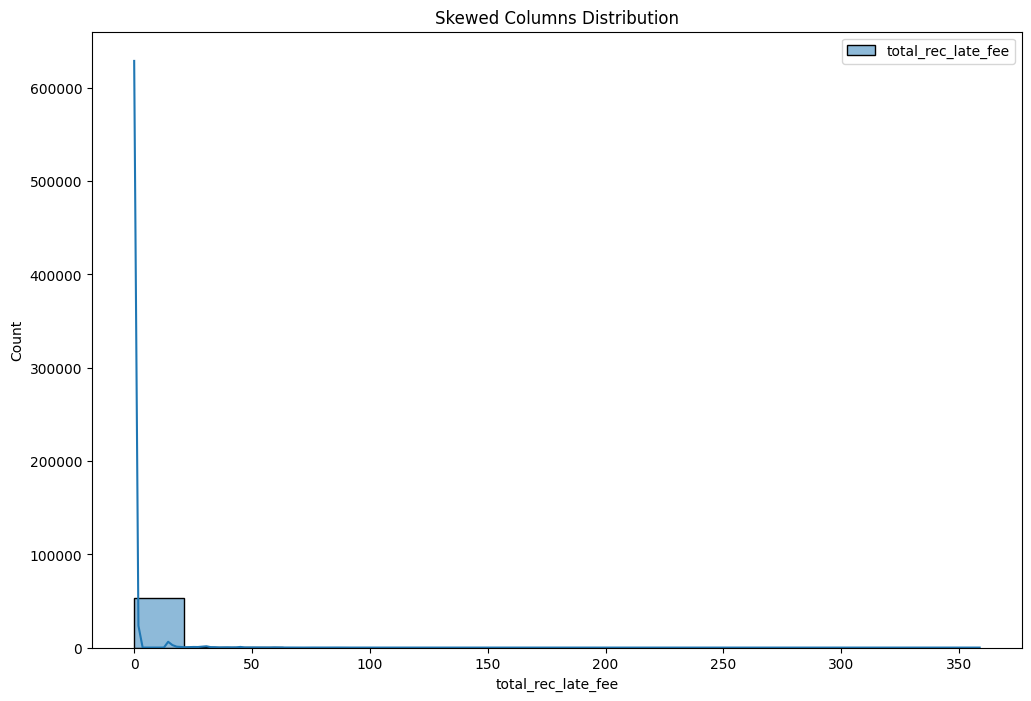

<Figure size 20x10 with 0 Axes>

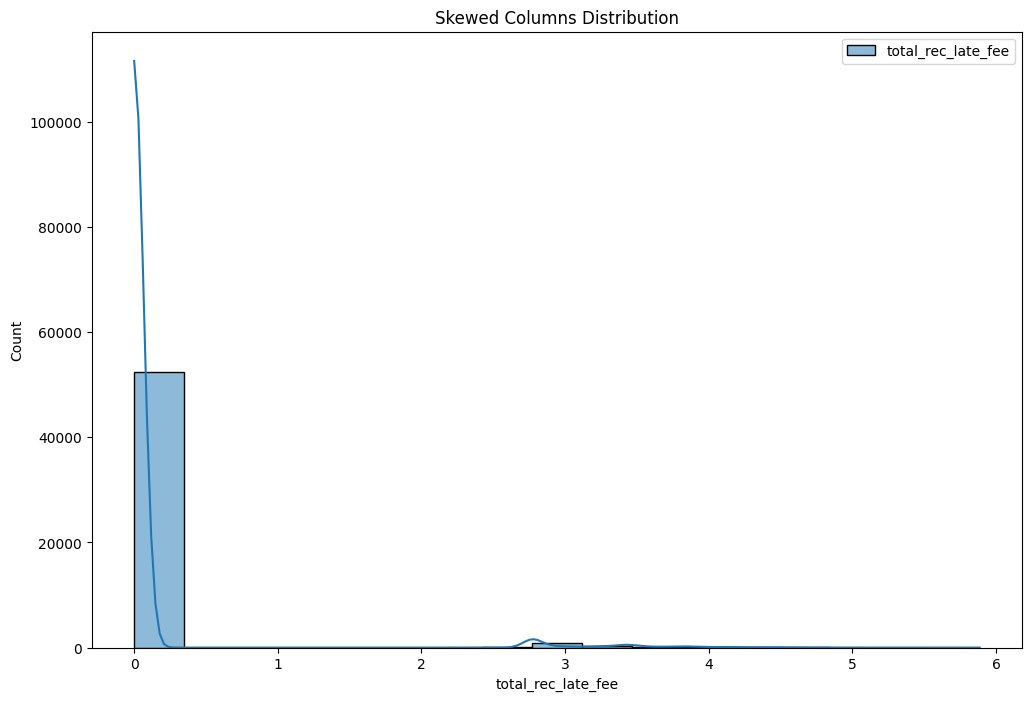

<Figure size 20x10 with 0 Axes>

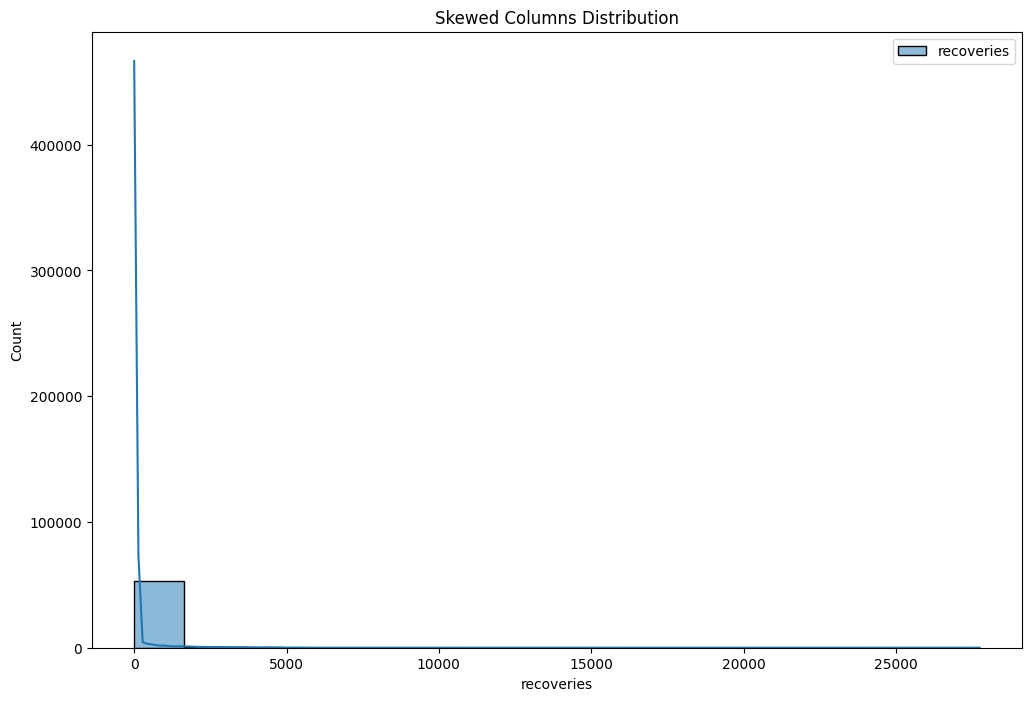

<Figure size 20x10 with 0 Axes>

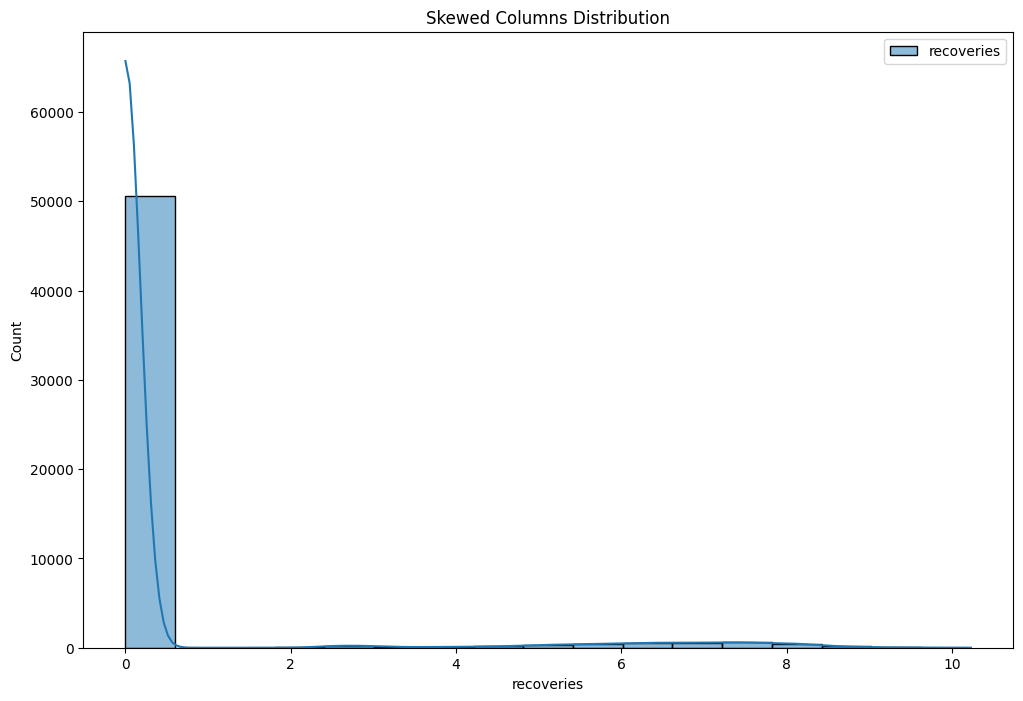

<Figure size 20x10 with 0 Axes>

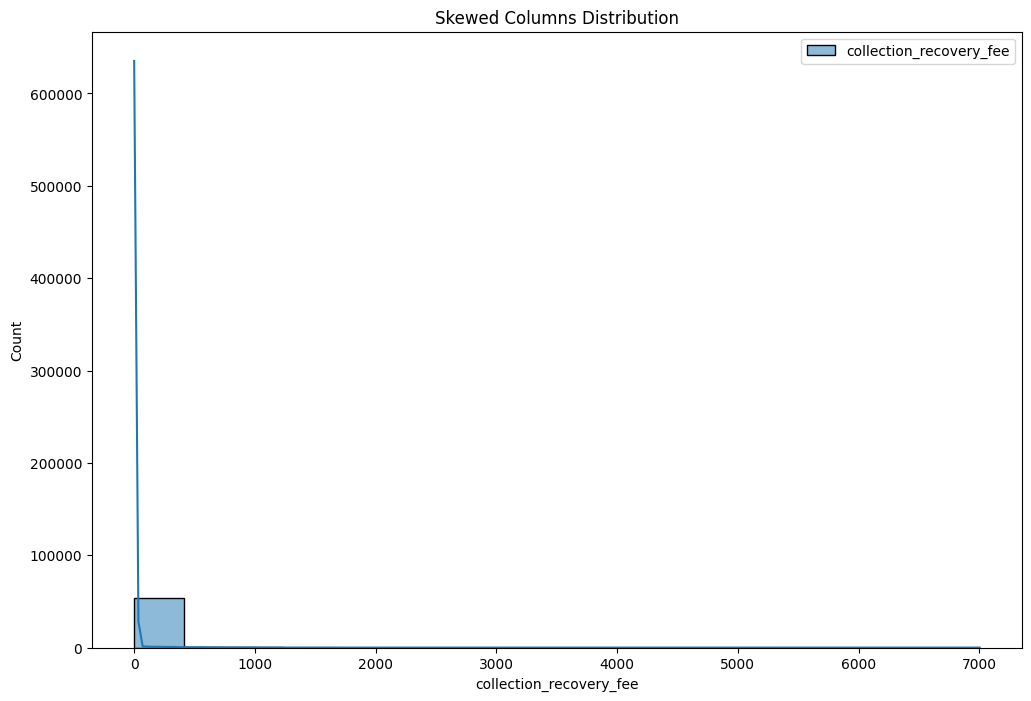

<Figure size 20x10 with 0 Axes>

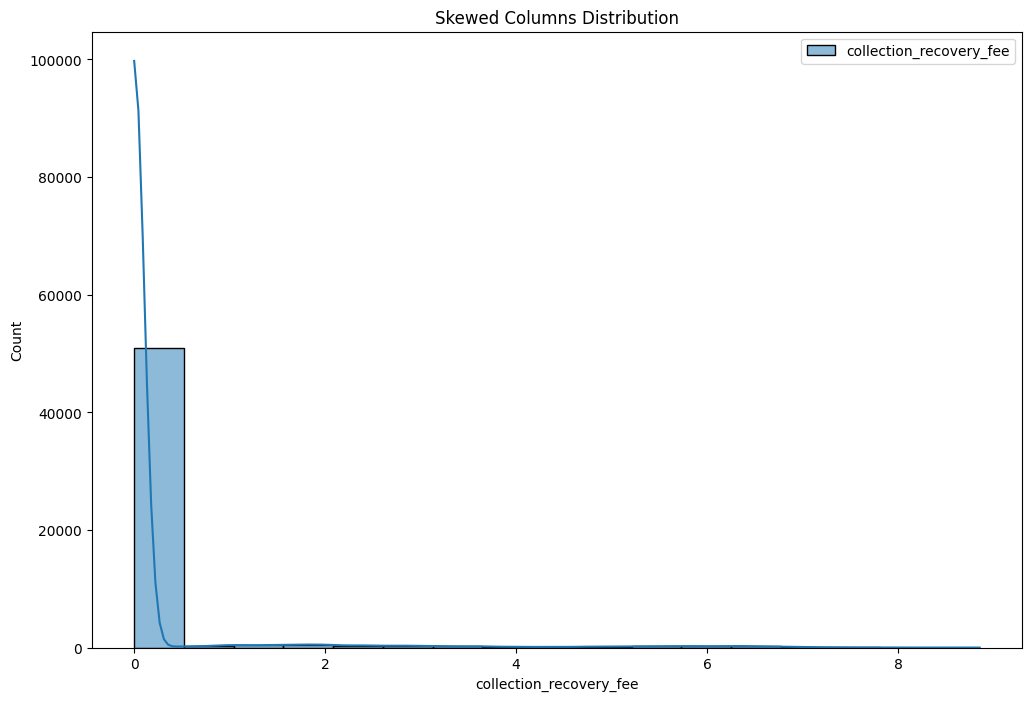

<Figure size 20x10 with 0 Axes>

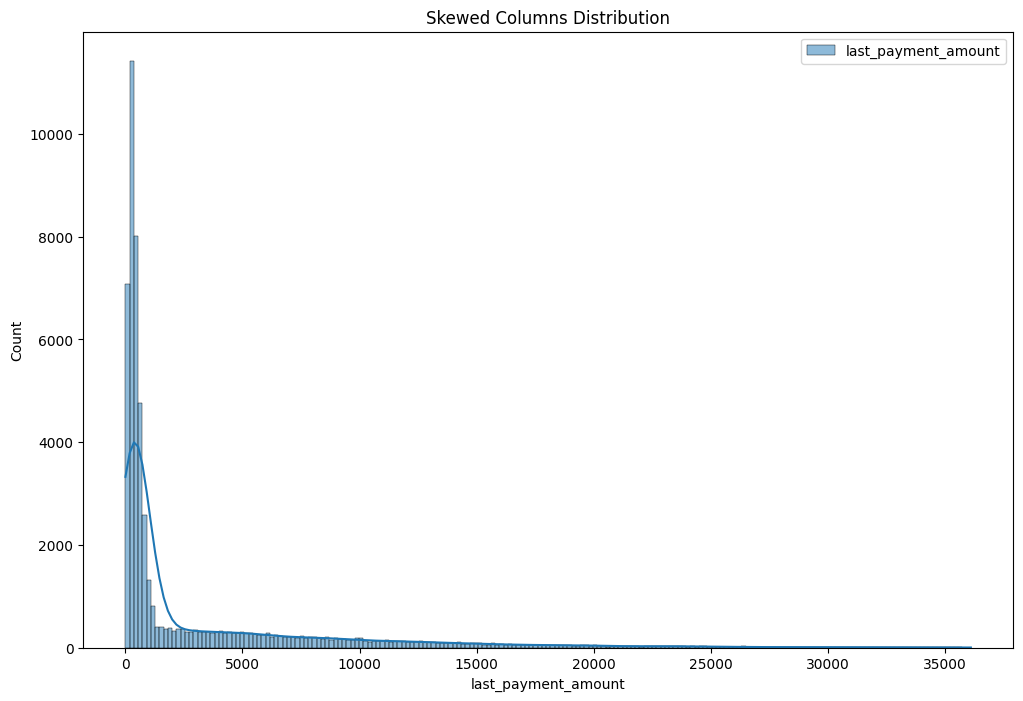

<Figure size 20x10 with 0 Axes>

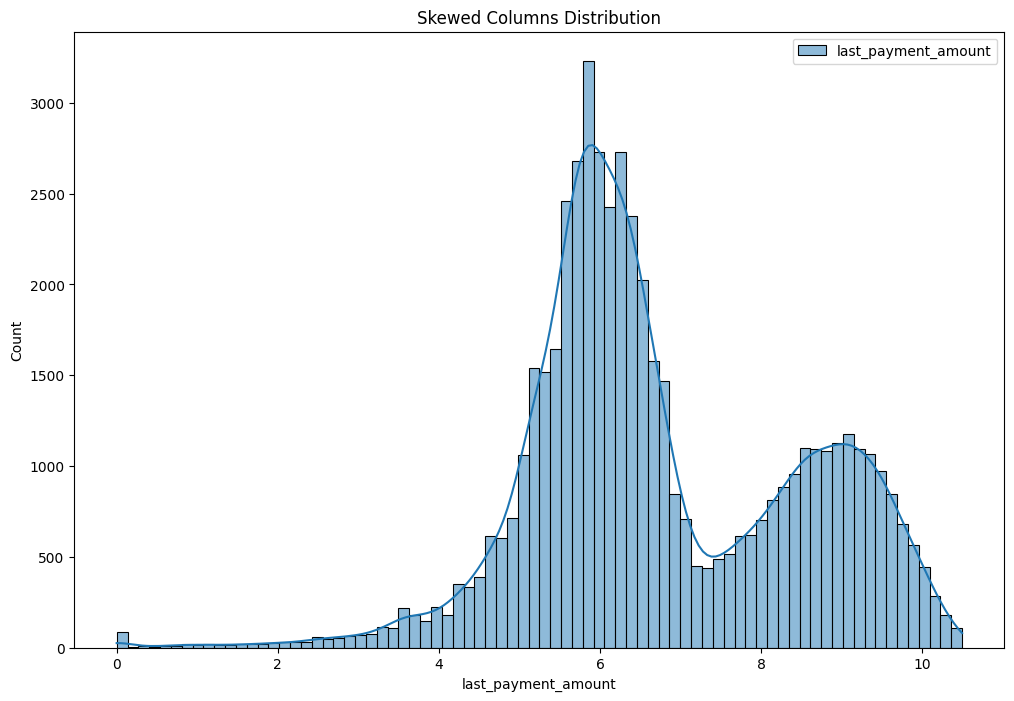

<Figure size 20x10 with 0 Axes>

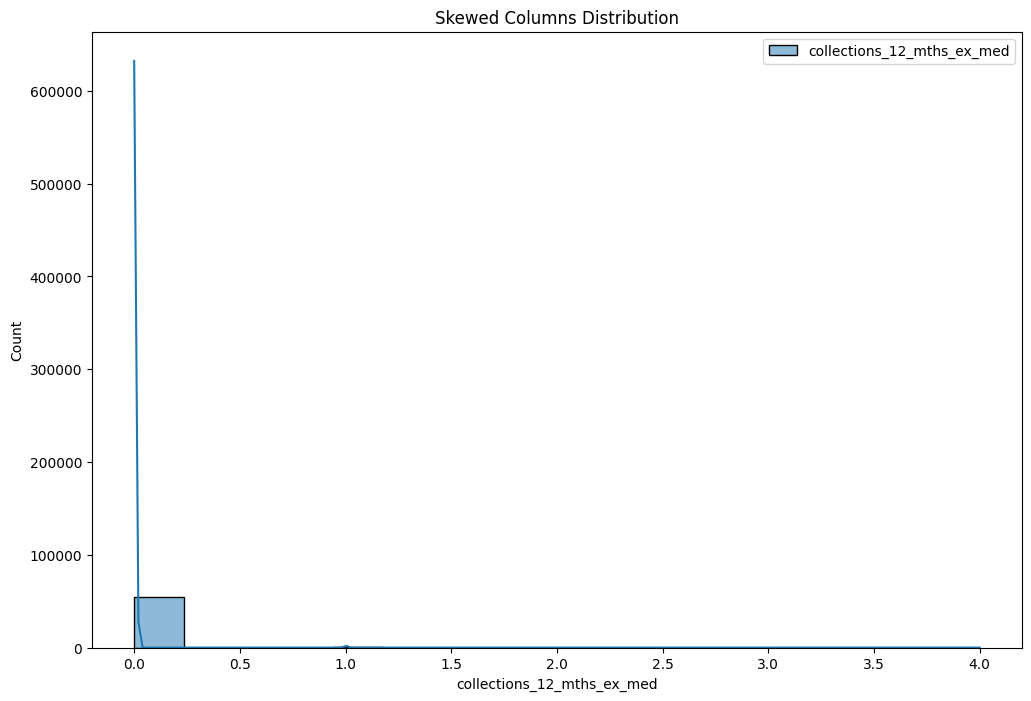

<Figure size 20x10 with 0 Axes>

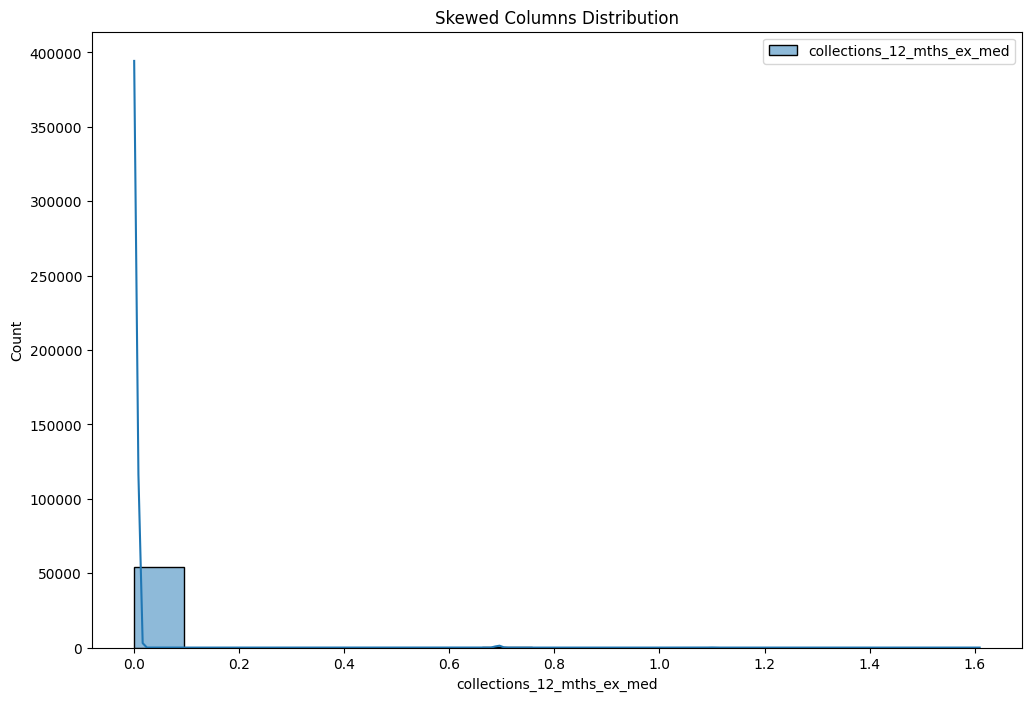

In [5]:
from db_utils import DataFrameTransform, identify_skewed_columns, Plotter
import numpy as np
import matplotlib.pyplot as plt


# Identify skewed columns
skewed_columns = identify_skewed_columns(df)

# Set a common figsize for all plots
figsize = (0.2, 0.1)

# Visualize skewness for each skewed column
for column in skewed_columns:
    # Create a DataFrame with the current column
    single_column_df = df[[column]]
    
    # Visualize skewness for the single column
    plt.figure(figsize=figsize)
    Plotter.visualize_skewness(single_column_df, [column])

    # Transform the single column using the .loc accessor and visualize again
    df.loc[:, column] = np.log1p(df[column])
    transformed_df = df[[column]]
    
    # Visualize skewness for the transformed single column
    plt.figure(figsize=figsize)
    Plotter.visualize_skewness(transformed_df, [column])

# Save the DataFrame after transformations
df.to_csv('transformed_data.csv', index=False)




<Figure size 20x10 with 0 Axes>

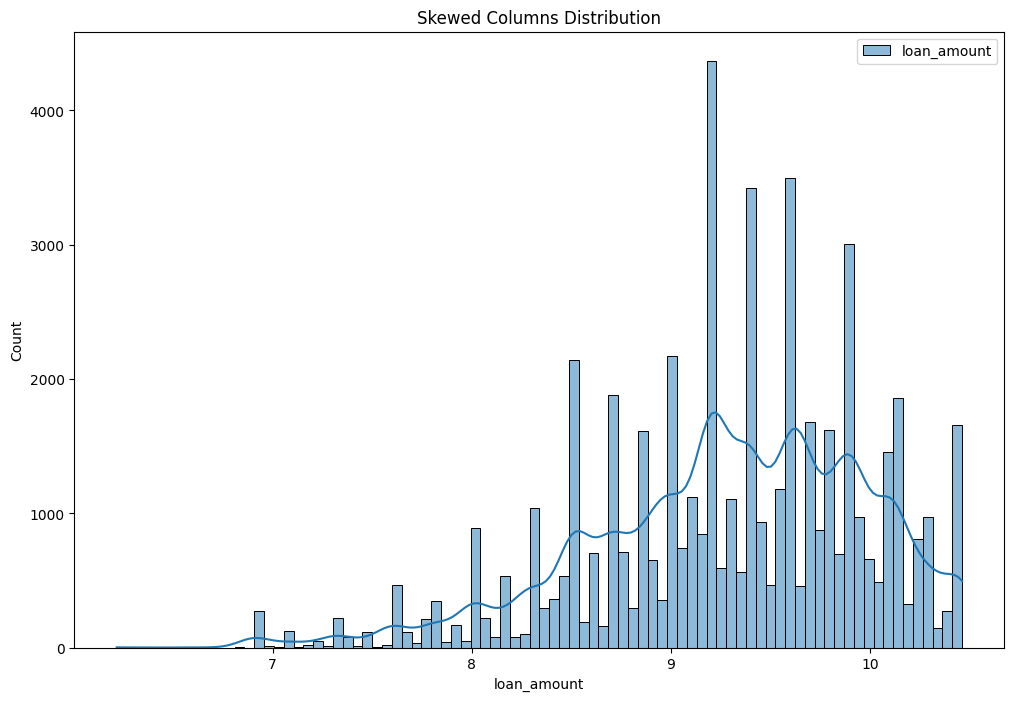

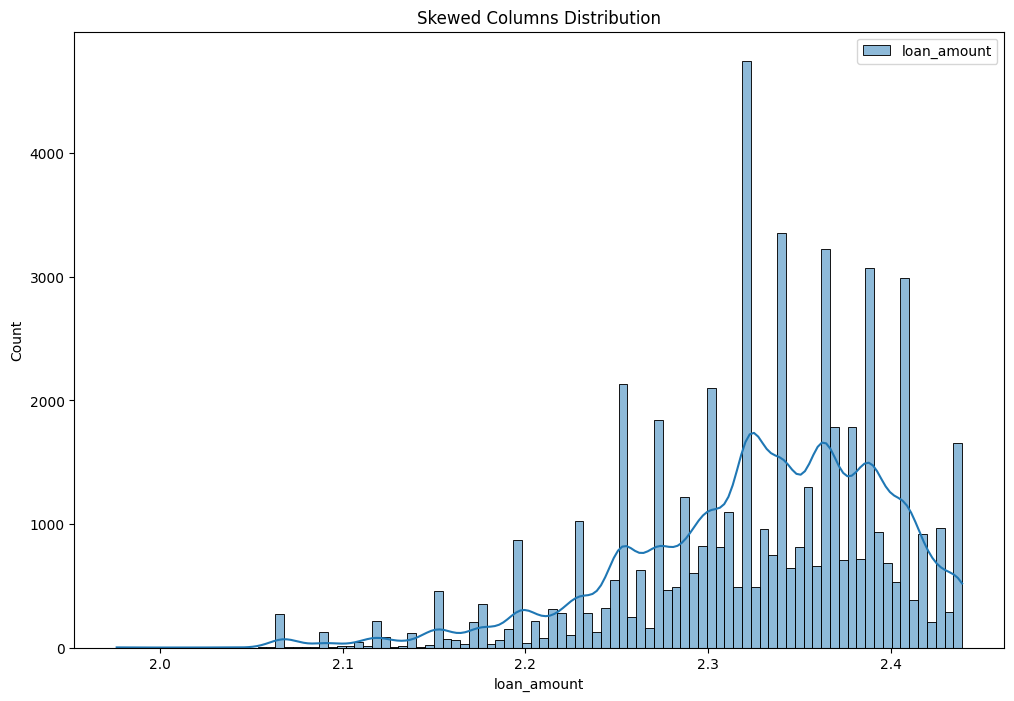

<Figure size 20x10 with 0 Axes>

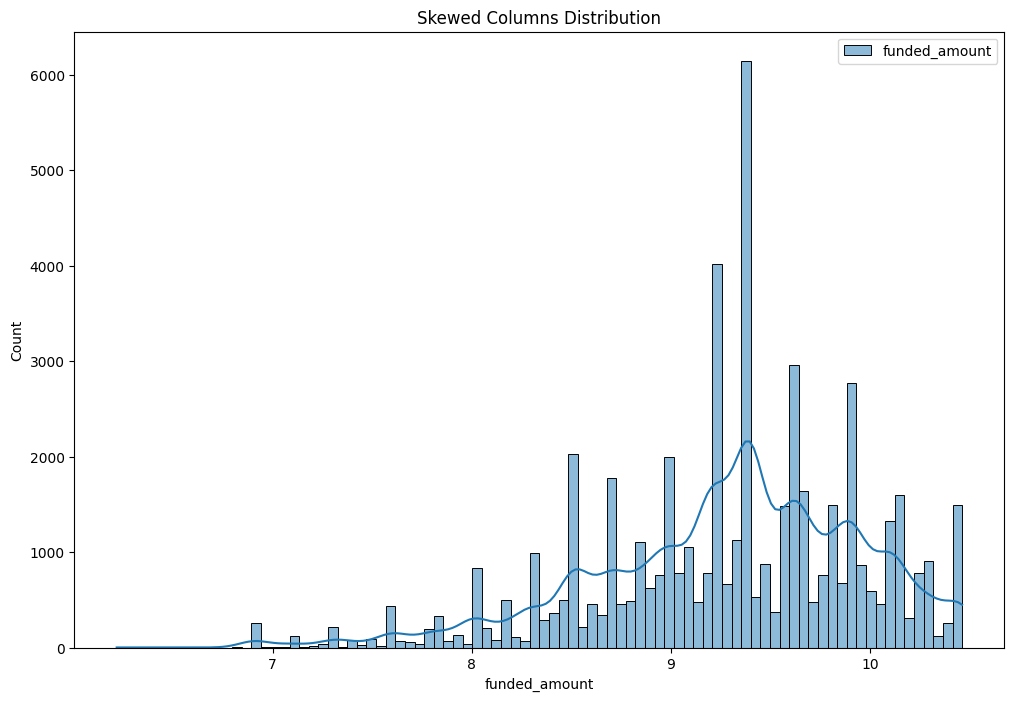

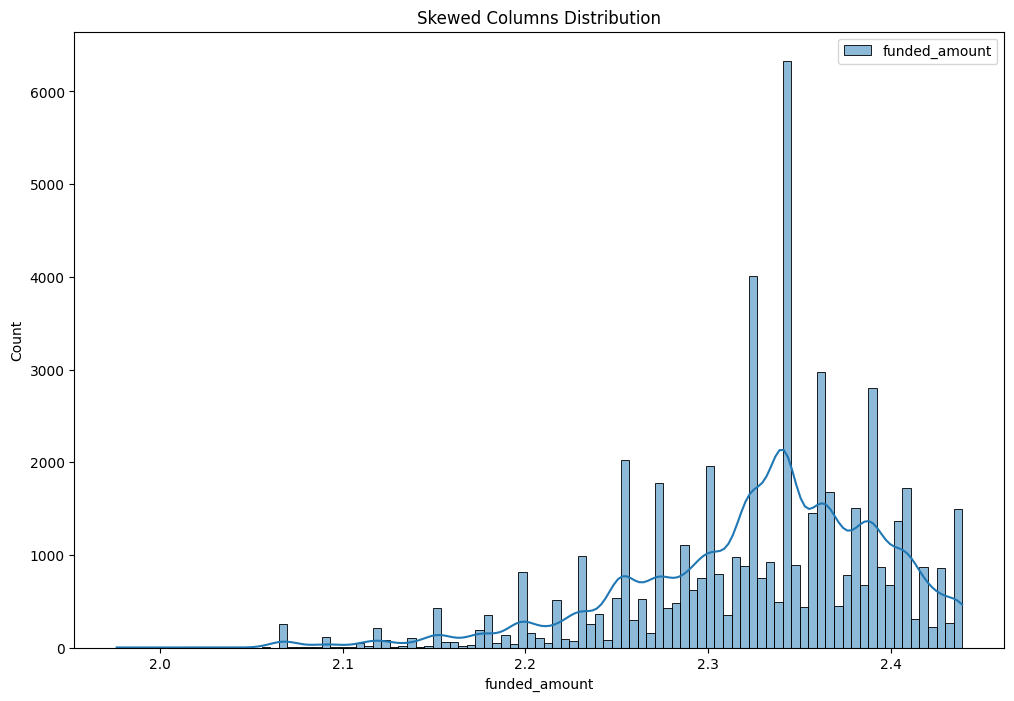

<Figure size 20x10 with 0 Axes>

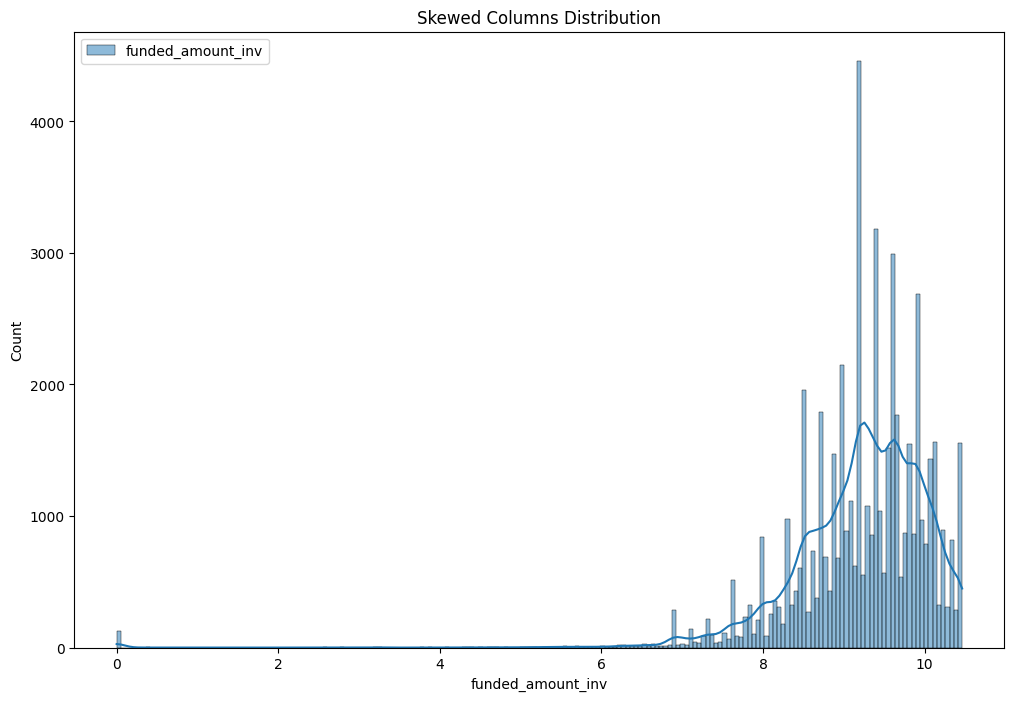

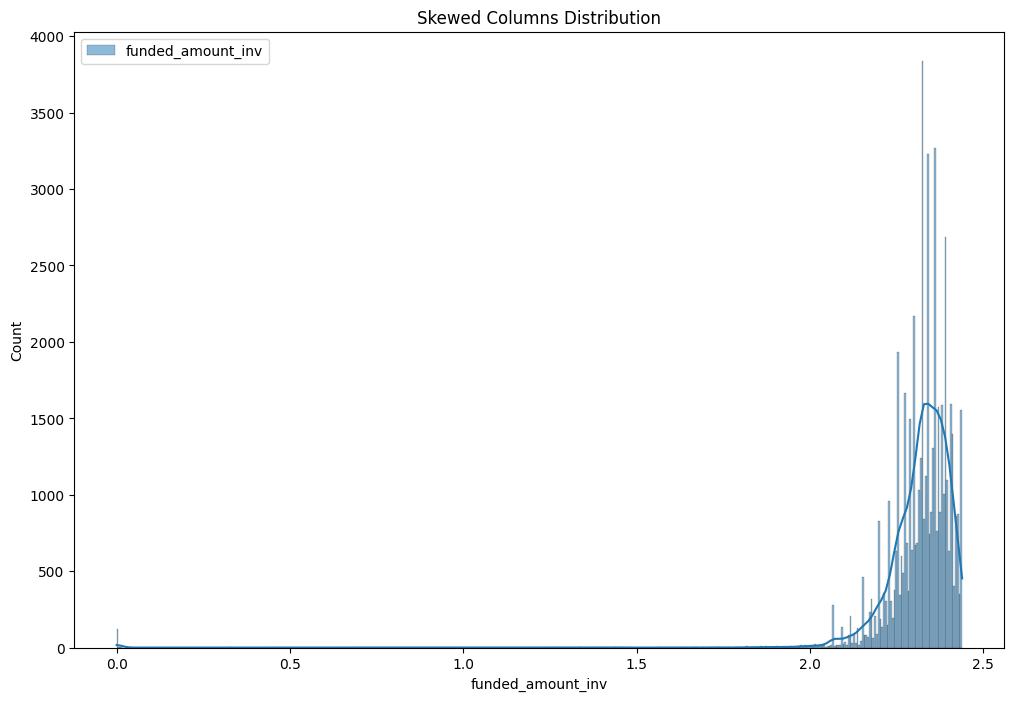

<Figure size 20x10 with 0 Axes>

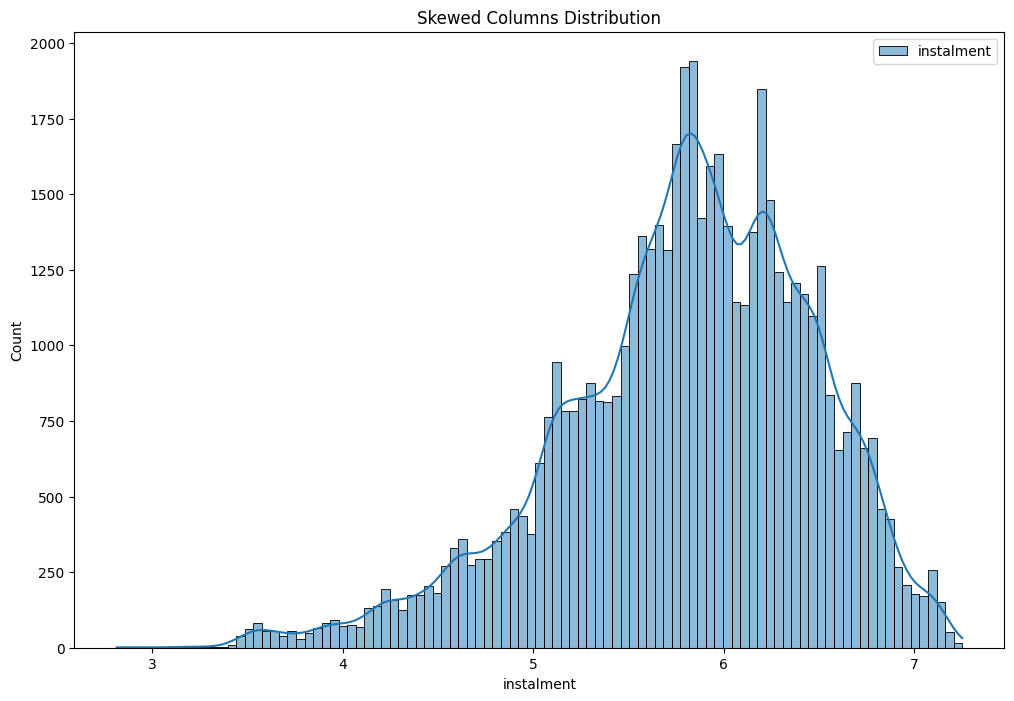

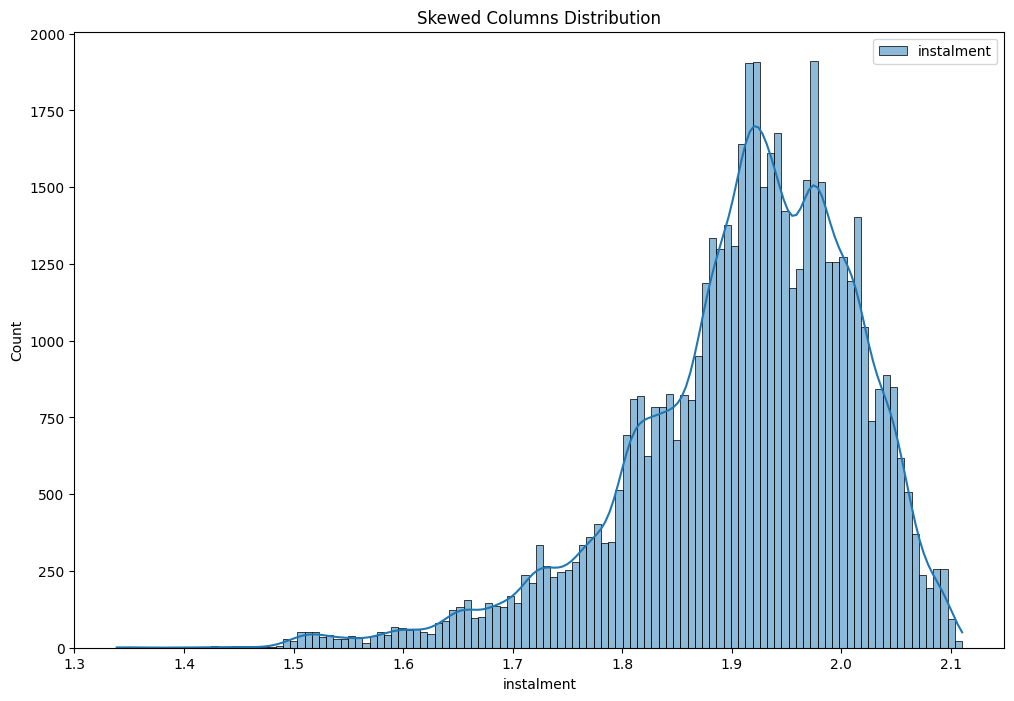

<Figure size 20x10 with 0 Axes>

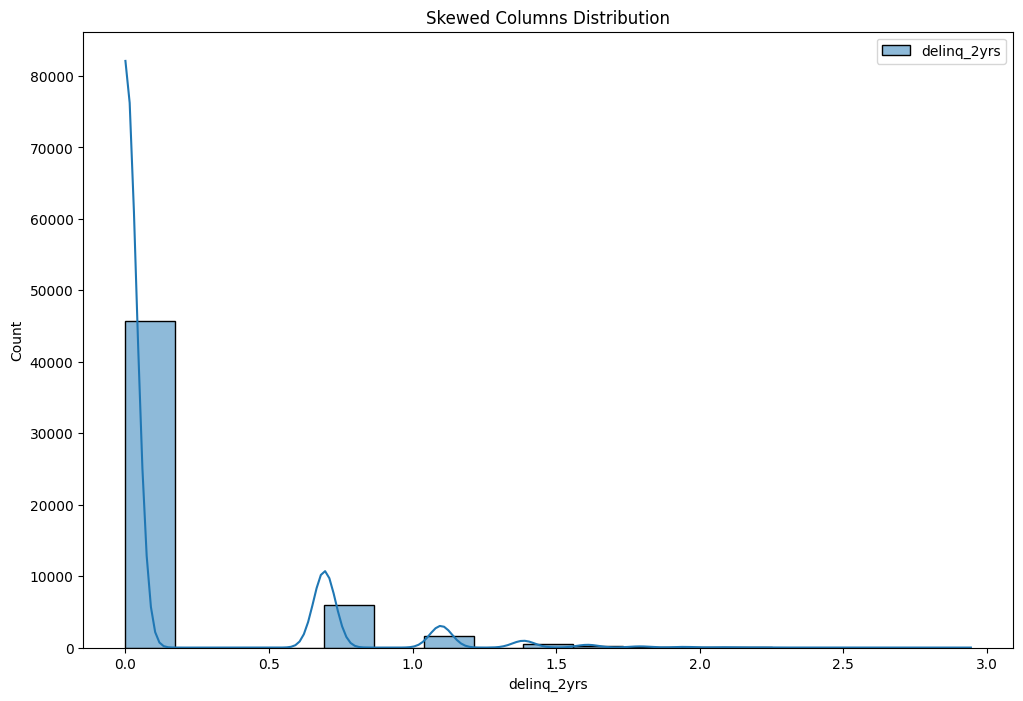

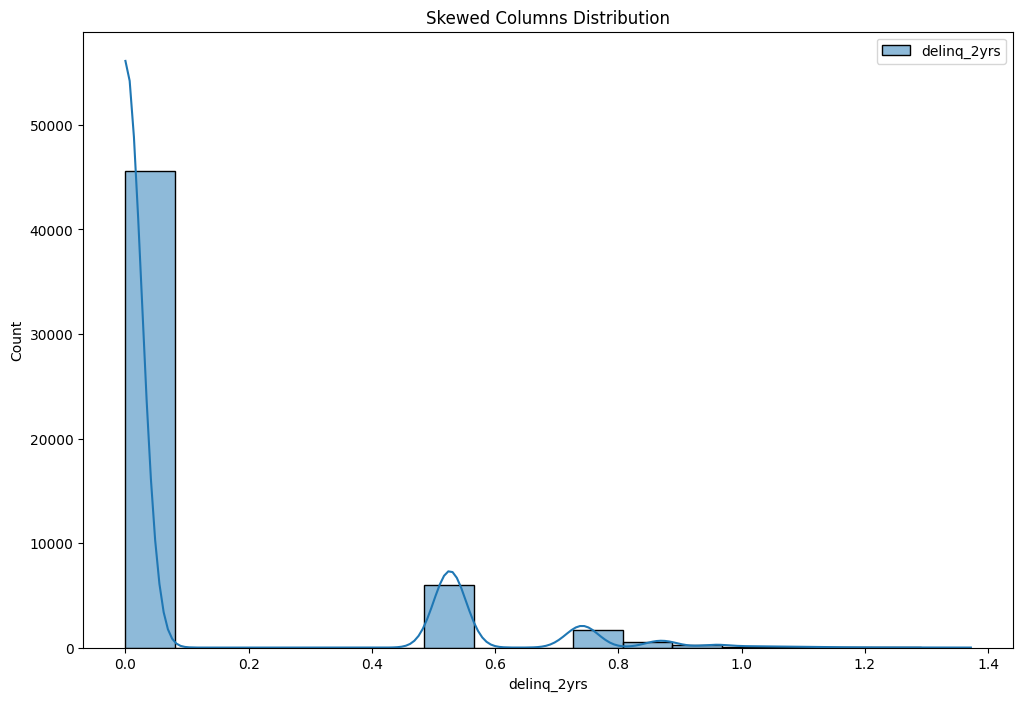

<Figure size 20x10 with 0 Axes>

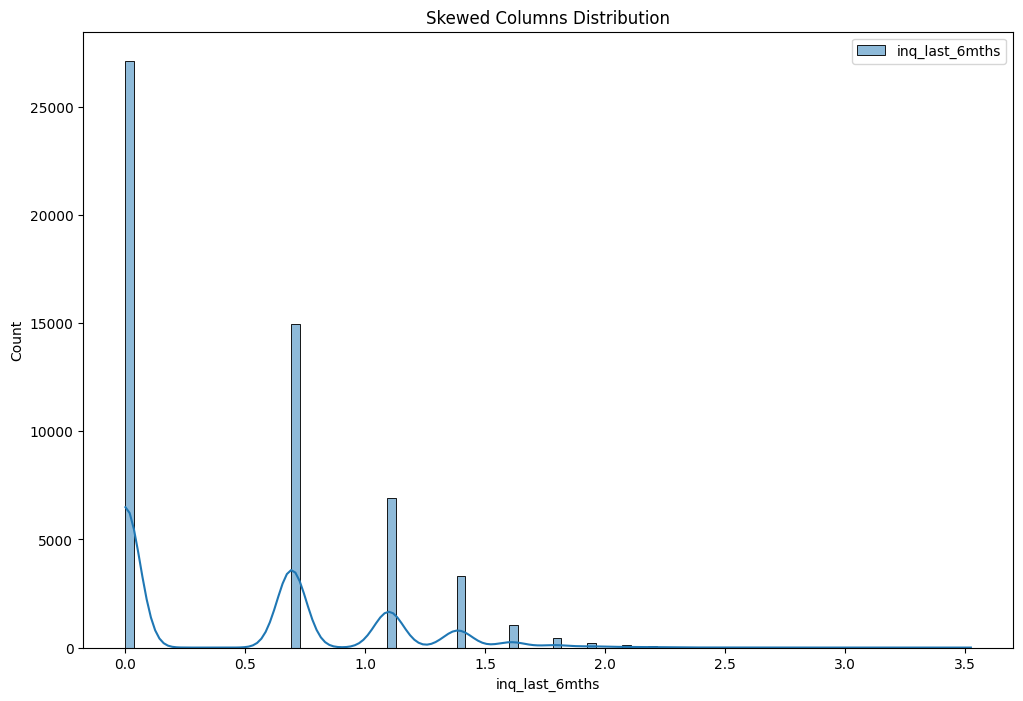

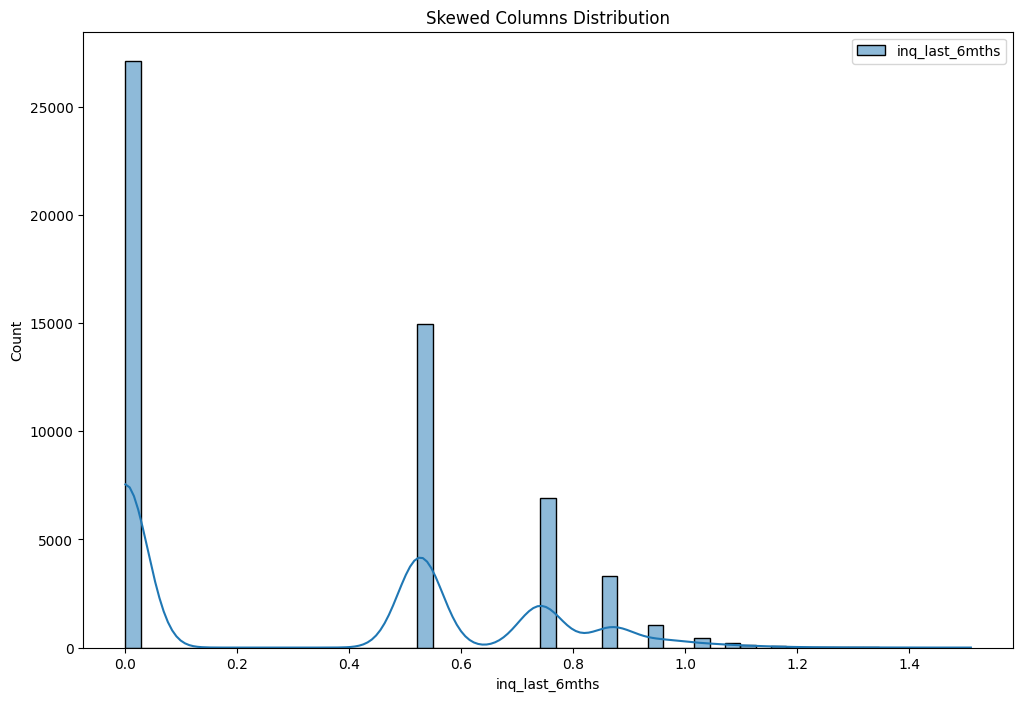

<Figure size 20x10 with 0 Axes>

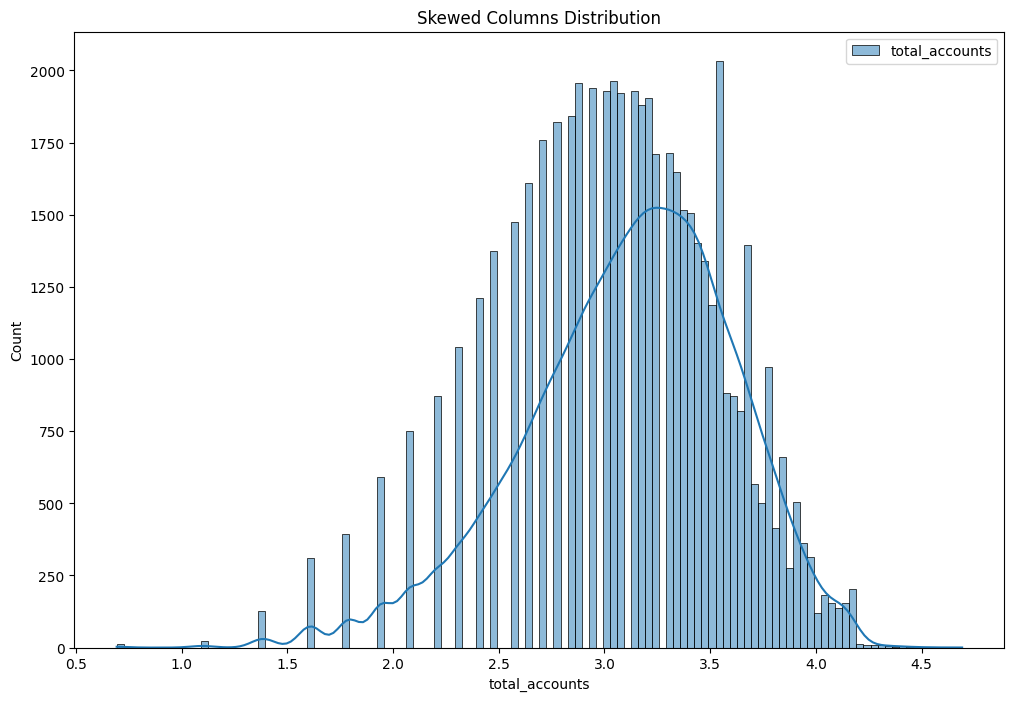

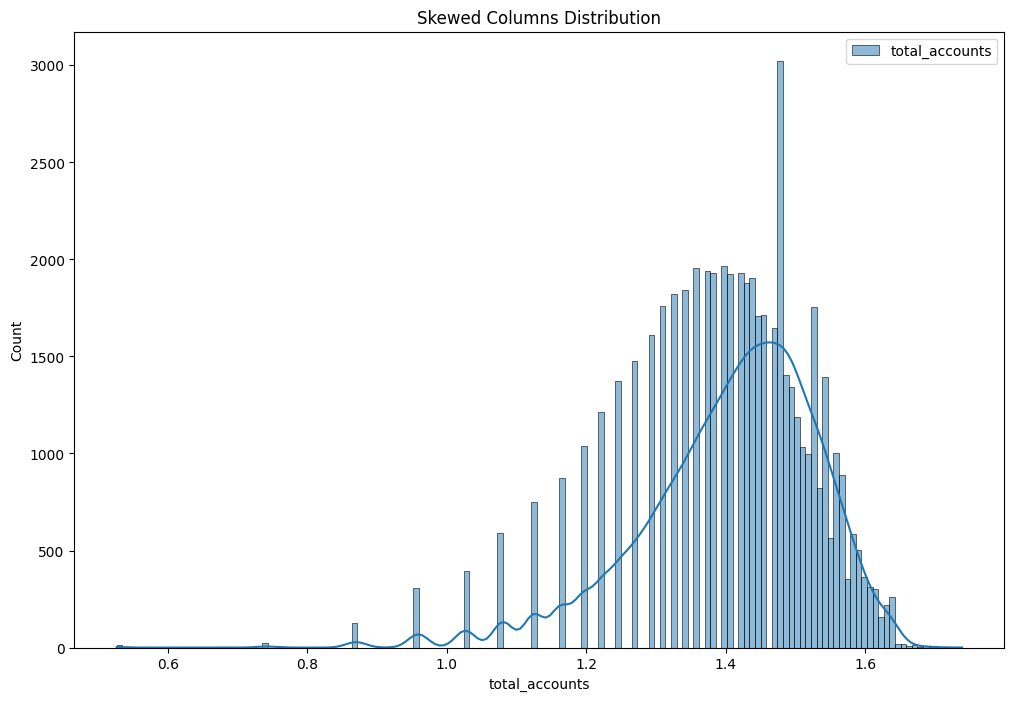

<Figure size 20x10 with 0 Axes>

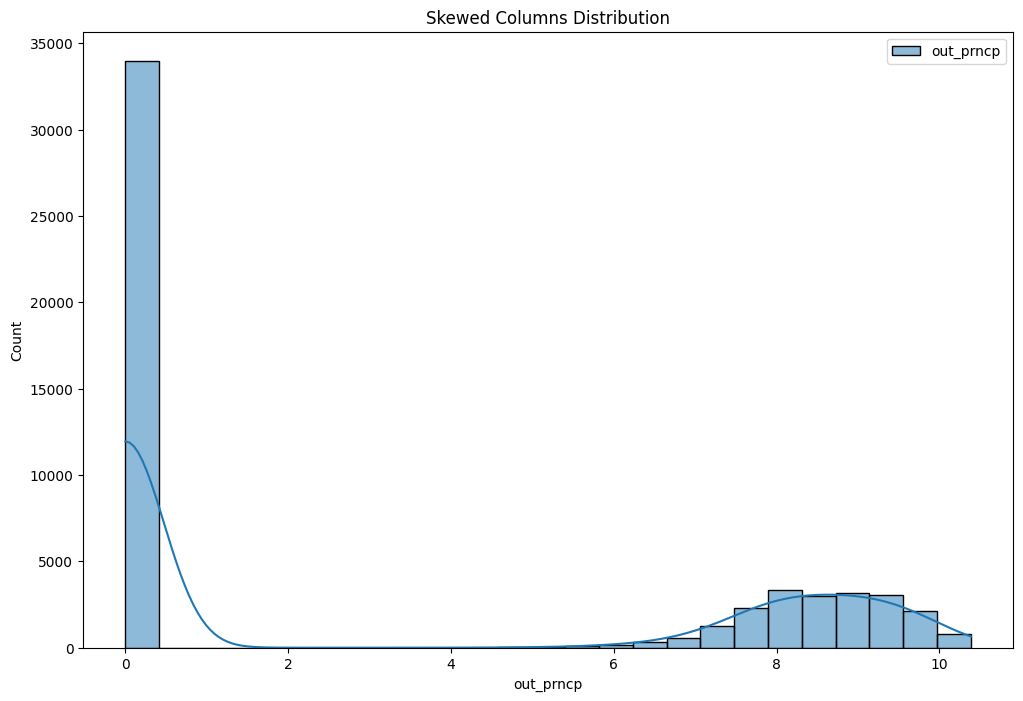

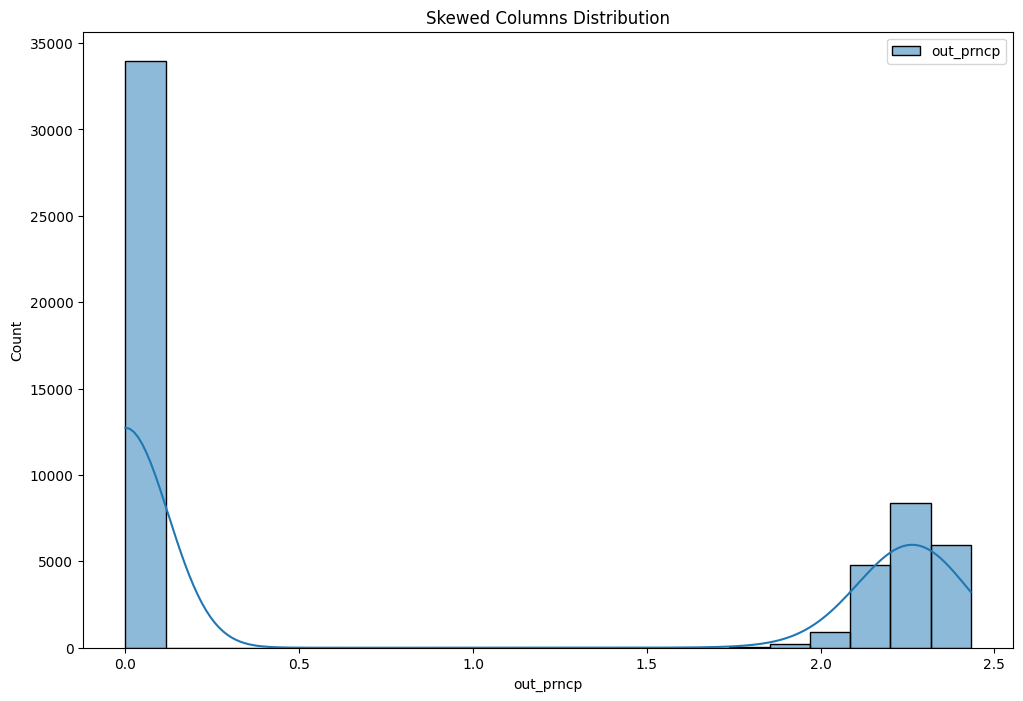

<Figure size 20x10 with 0 Axes>

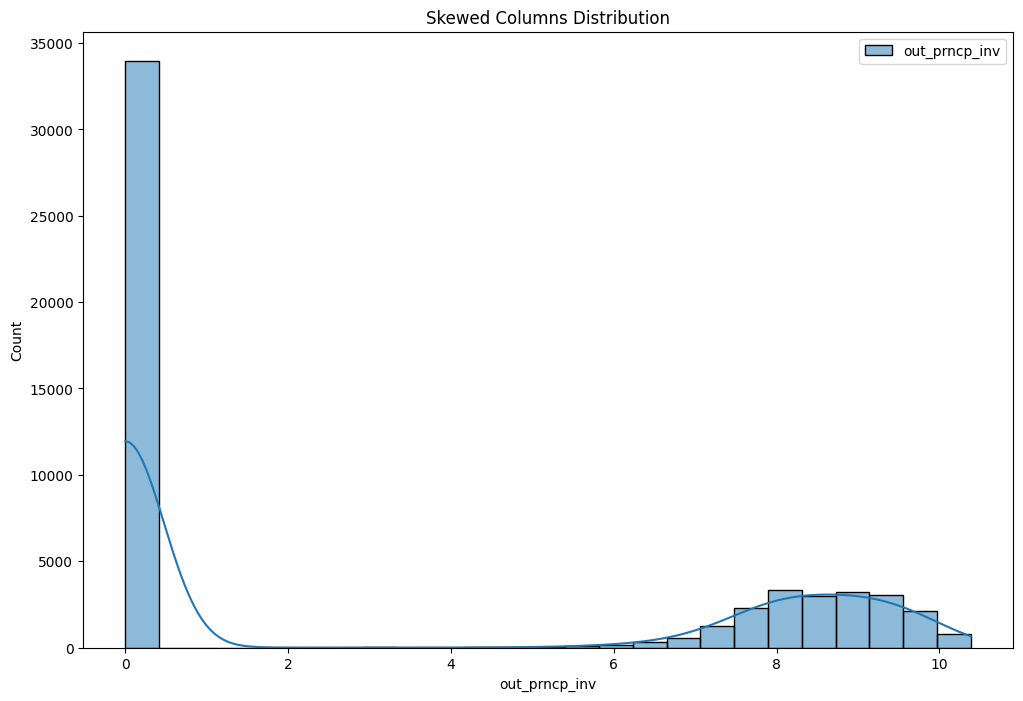

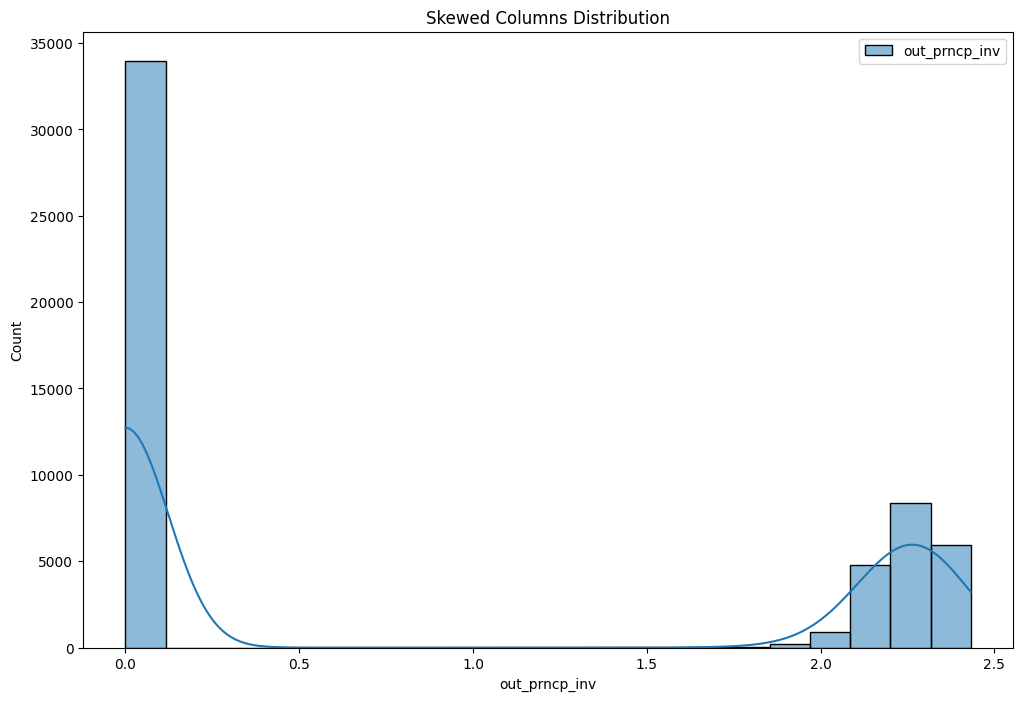

<Figure size 20x10 with 0 Axes>

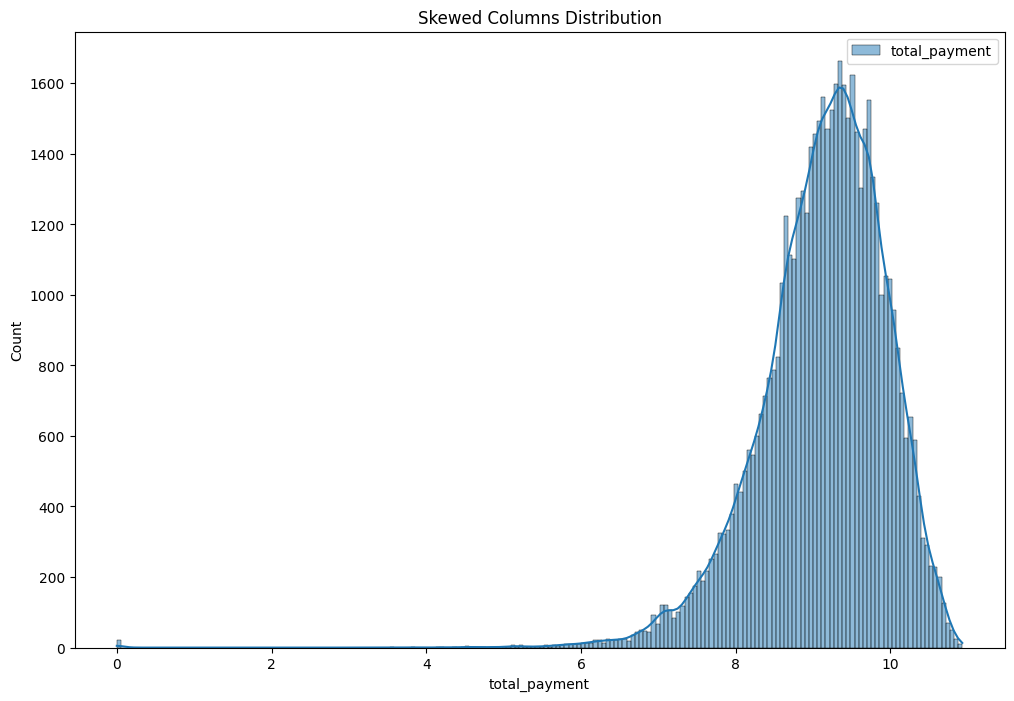

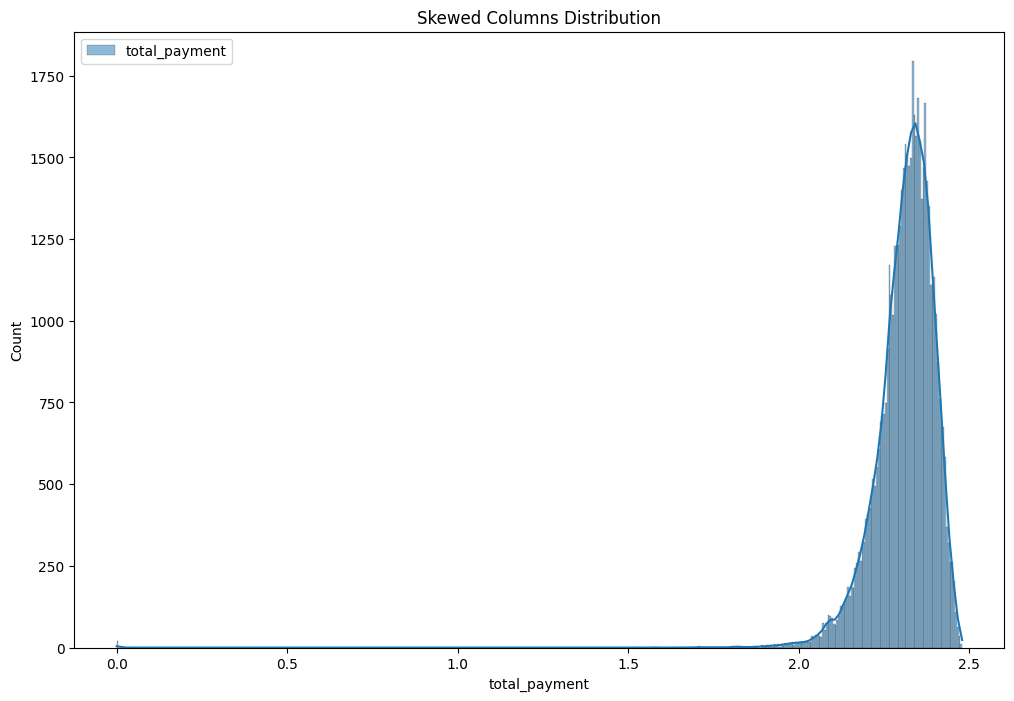

<Figure size 20x10 with 0 Axes>

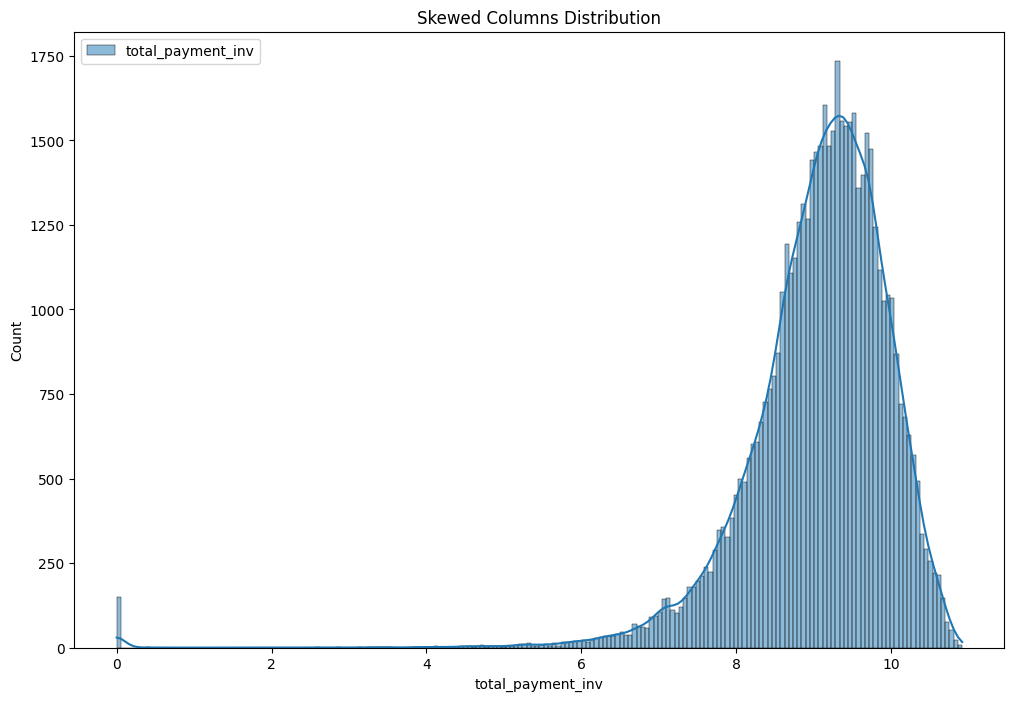

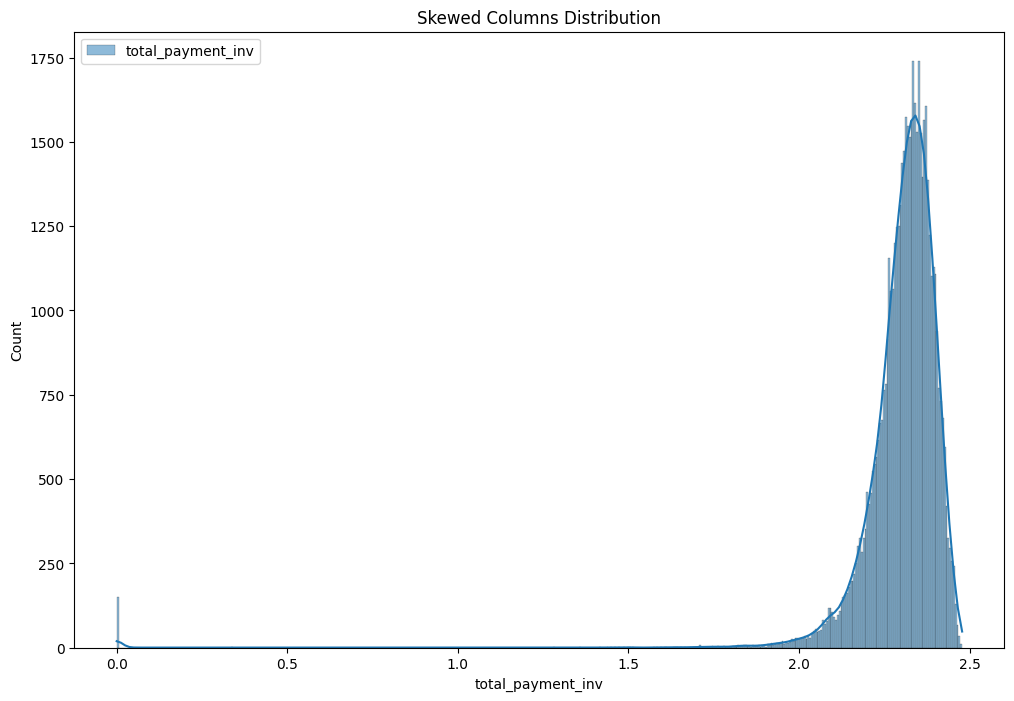

<Figure size 20x10 with 0 Axes>

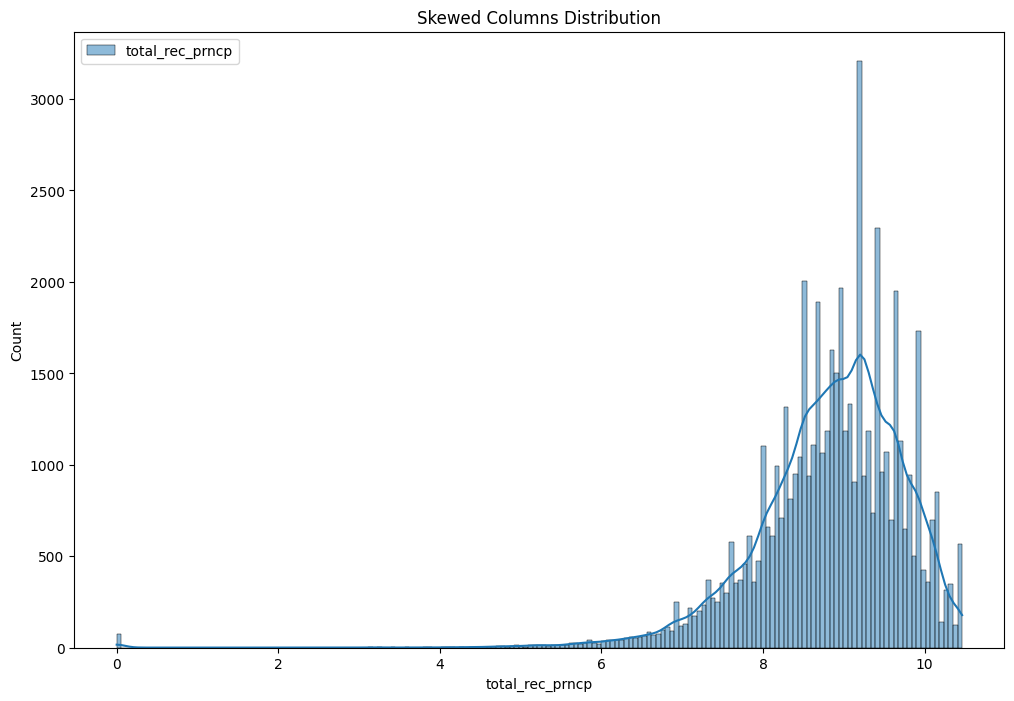

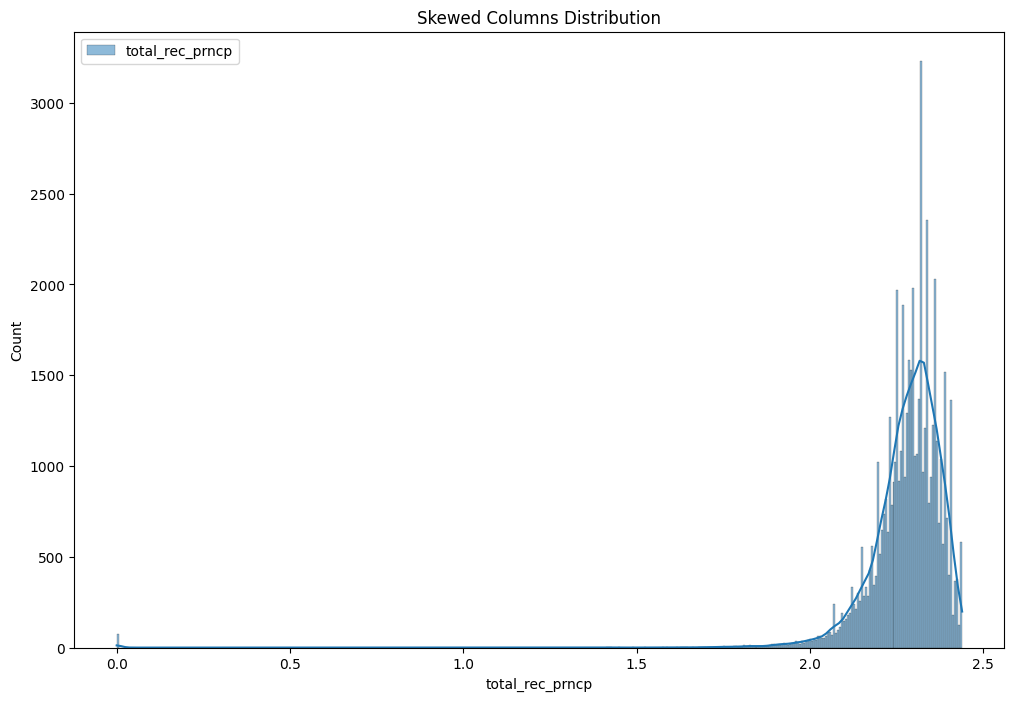

<Figure size 20x10 with 0 Axes>

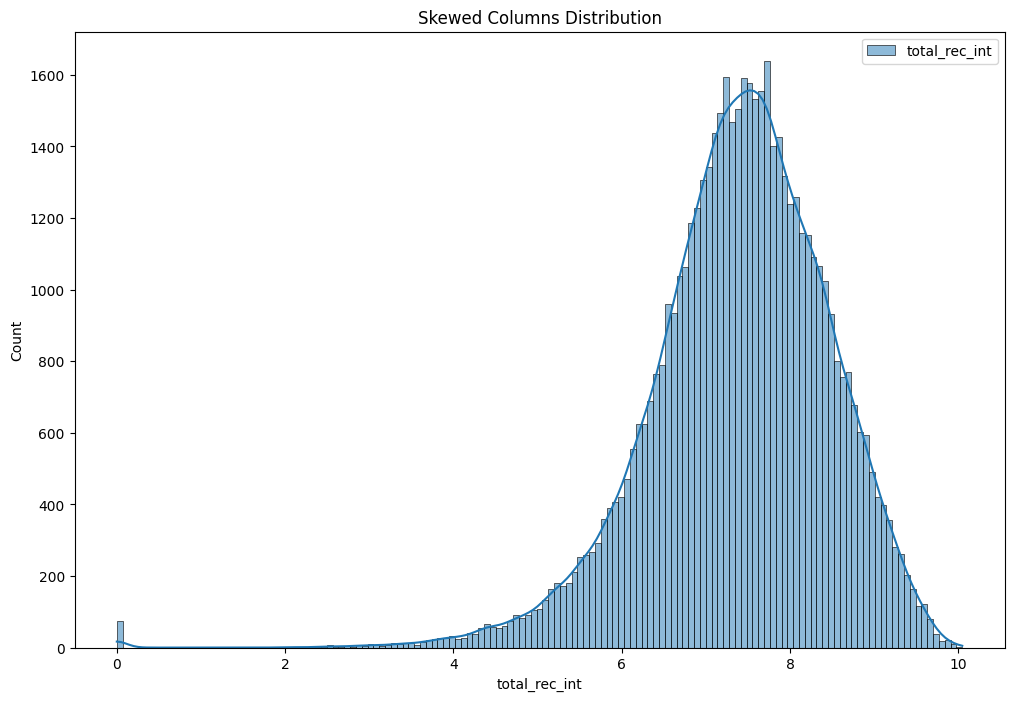

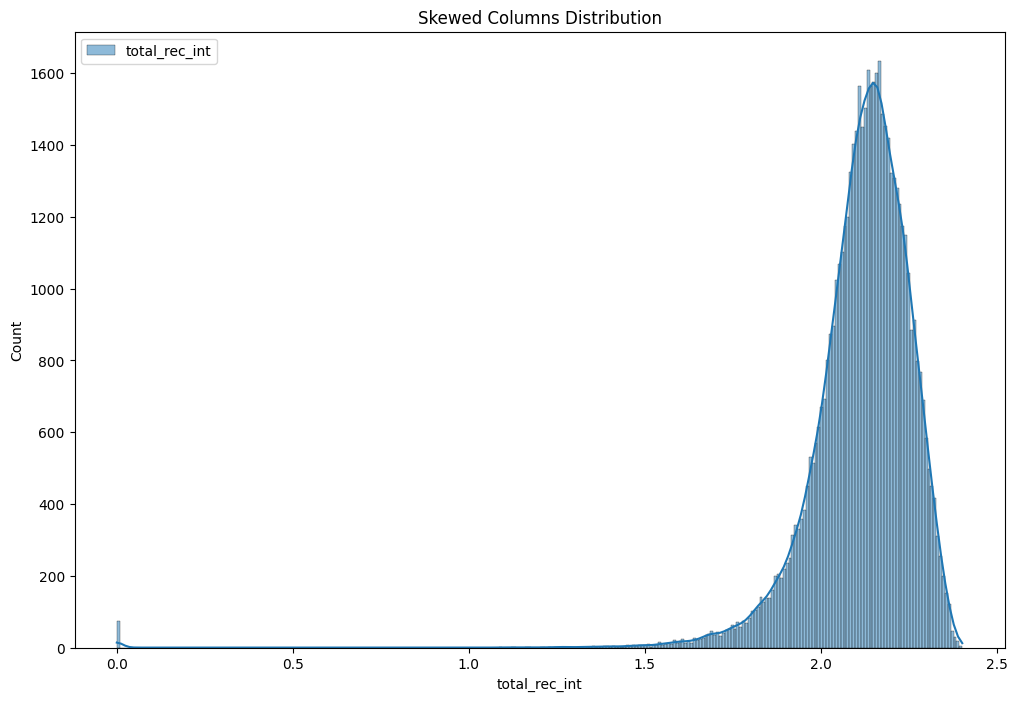

<Figure size 20x10 with 0 Axes>

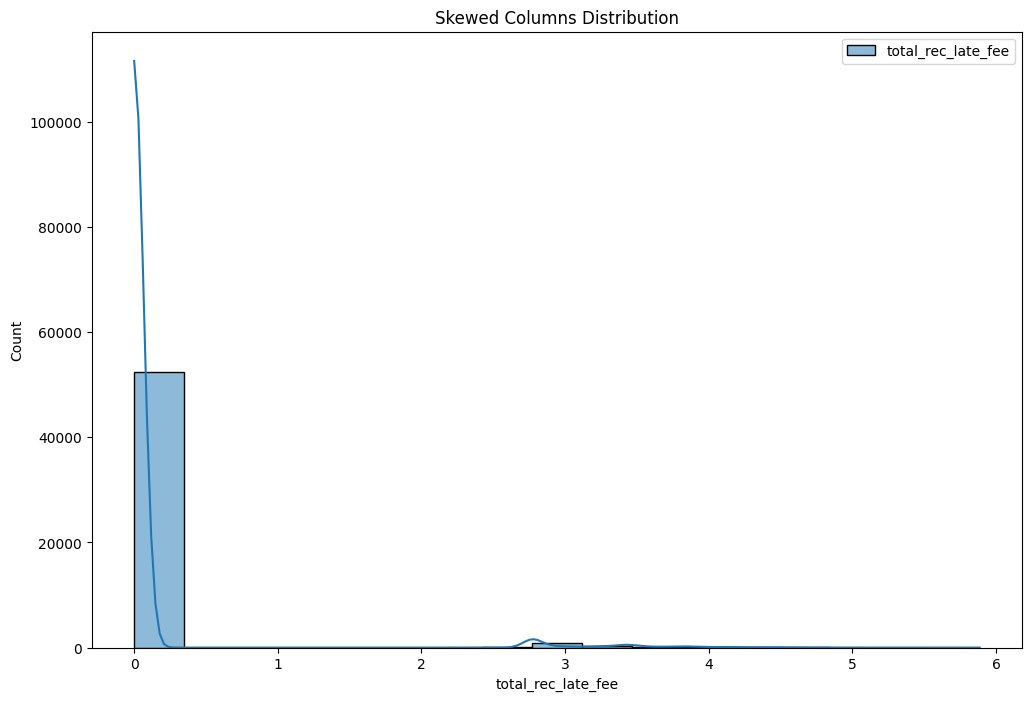

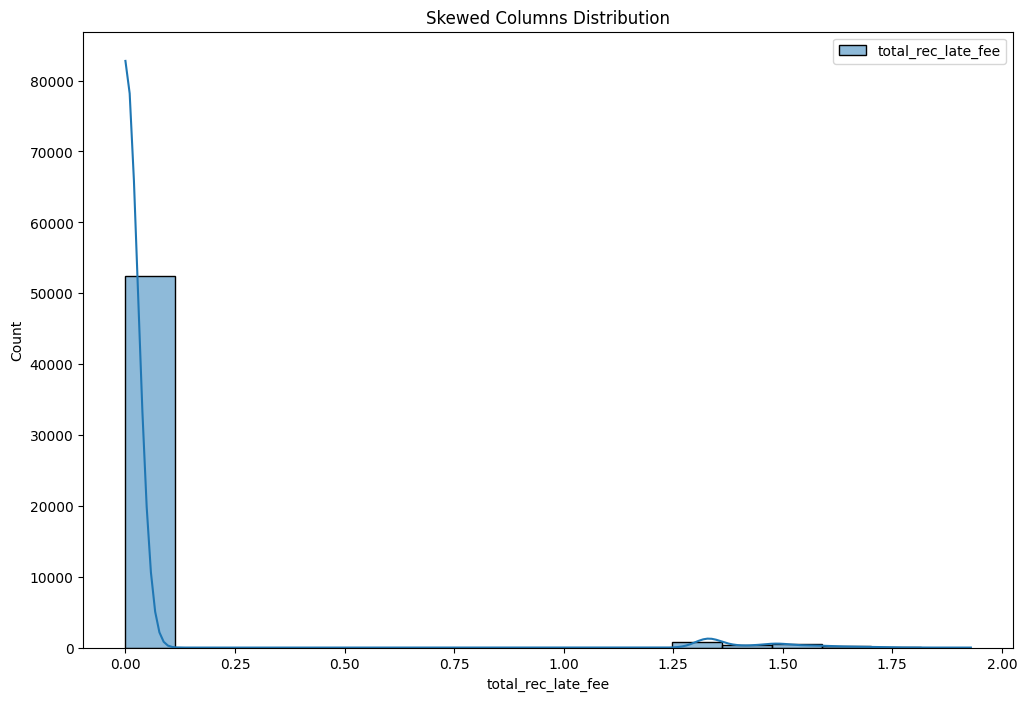

<Figure size 20x10 with 0 Axes>

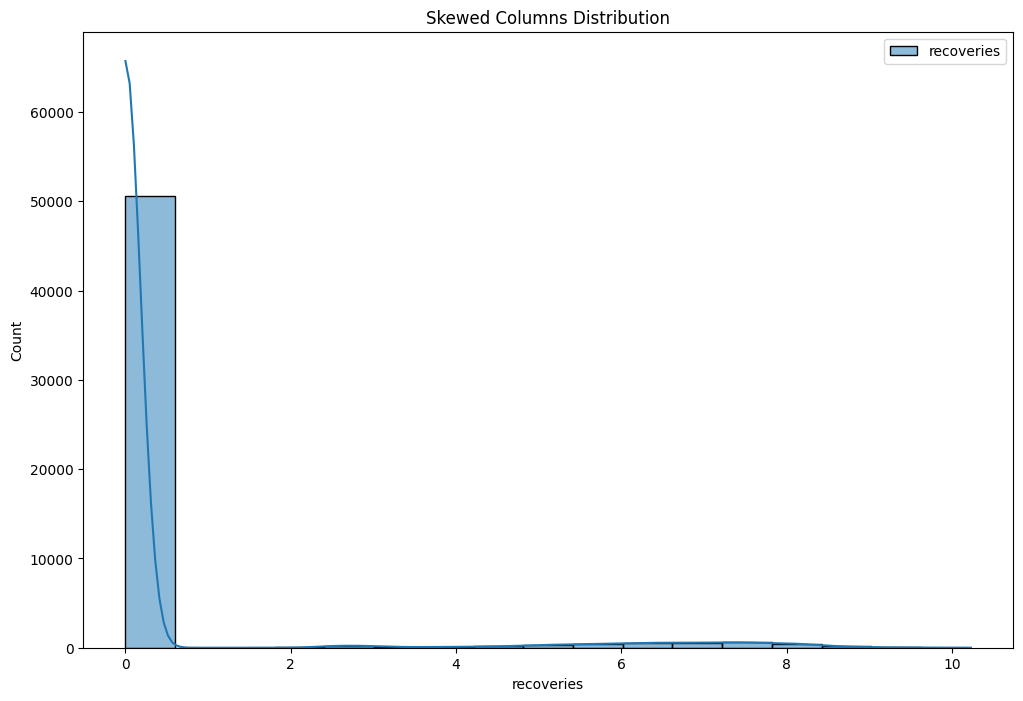

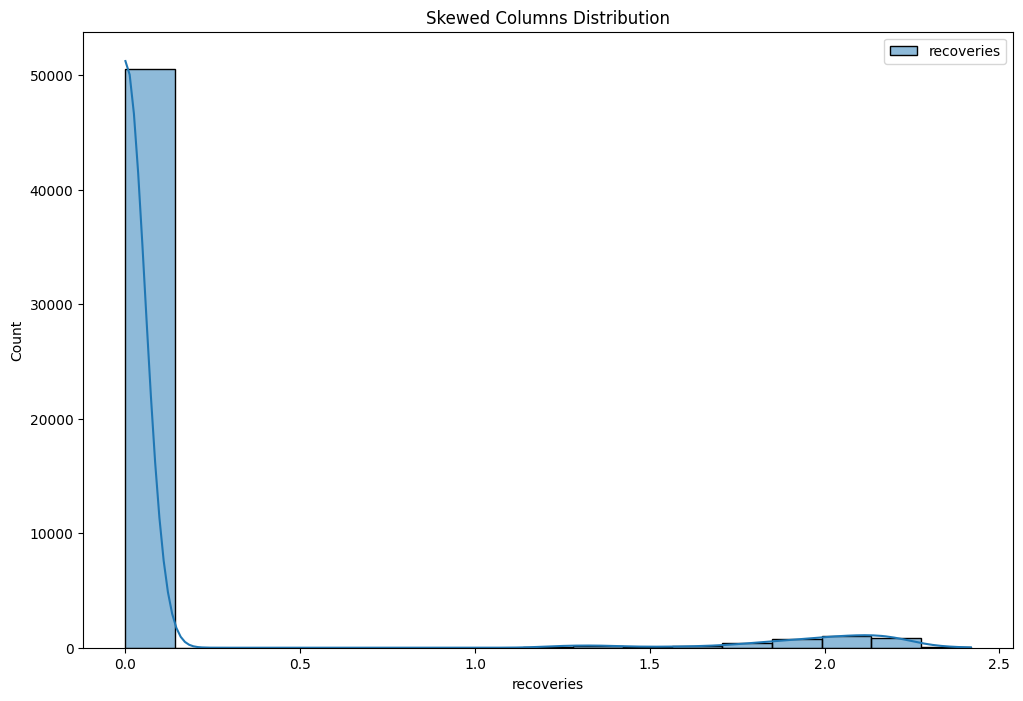

<Figure size 20x10 with 0 Axes>

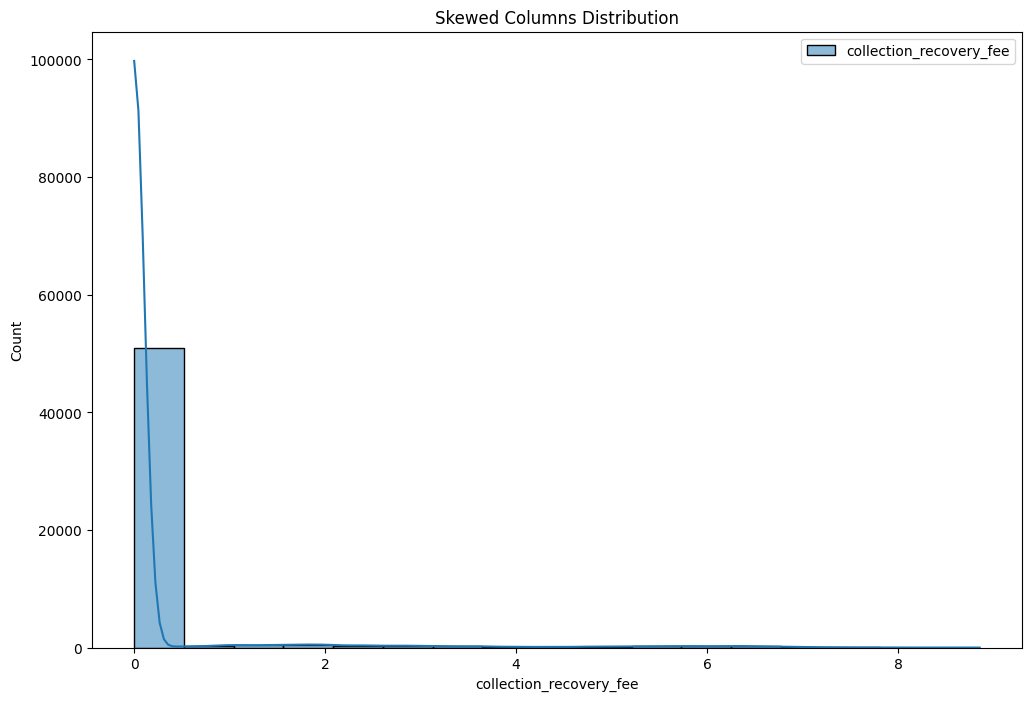

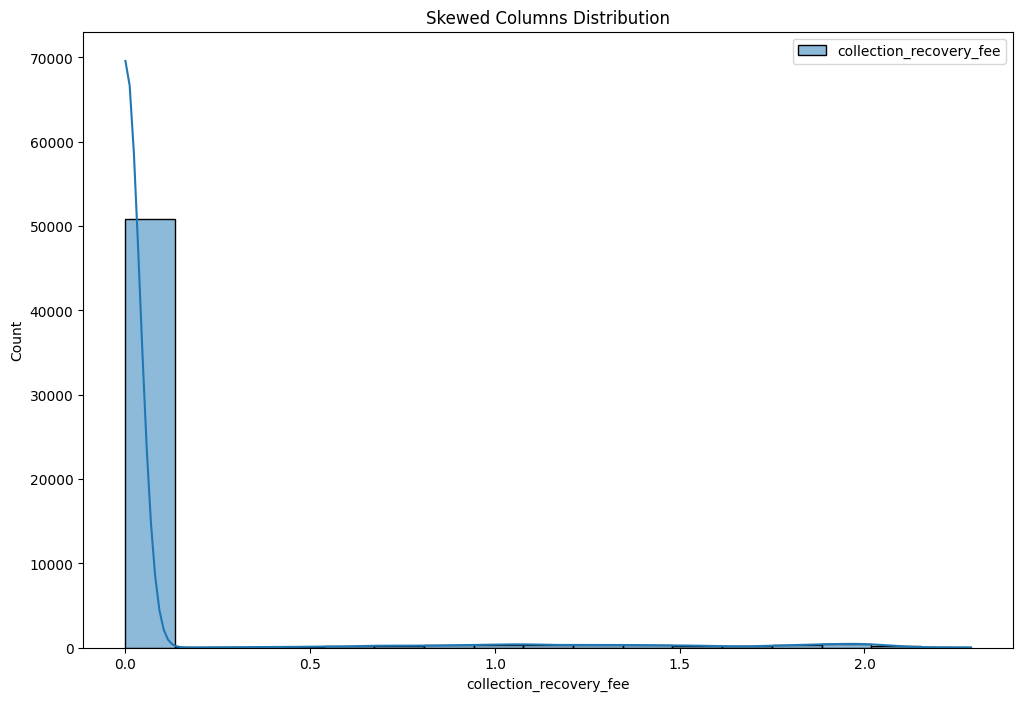

<Figure size 20x10 with 0 Axes>

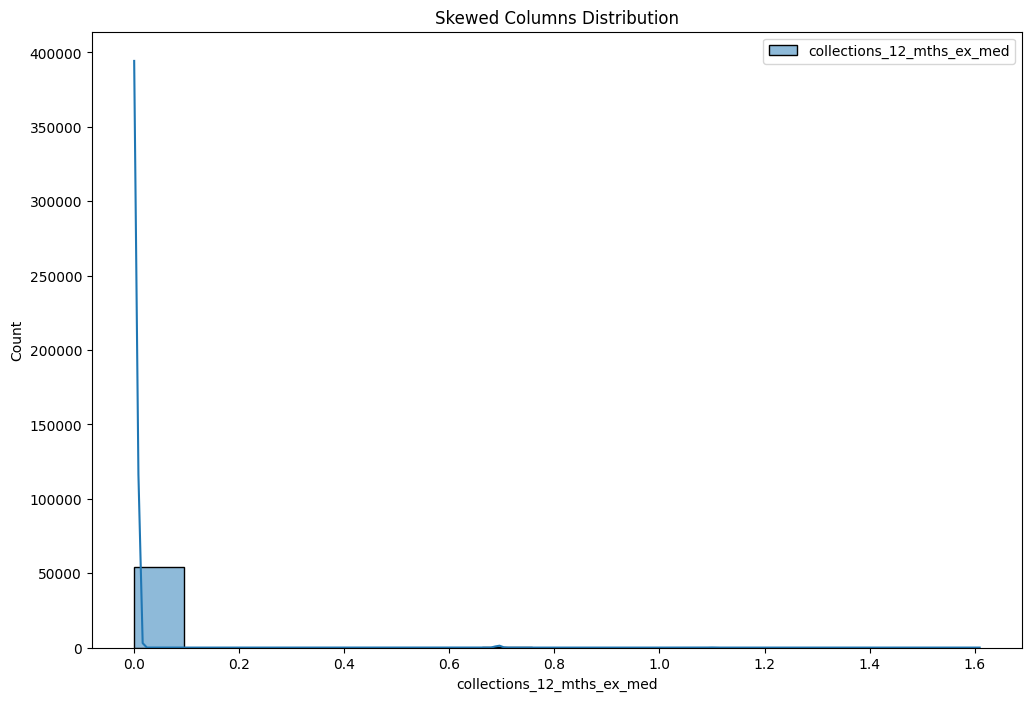

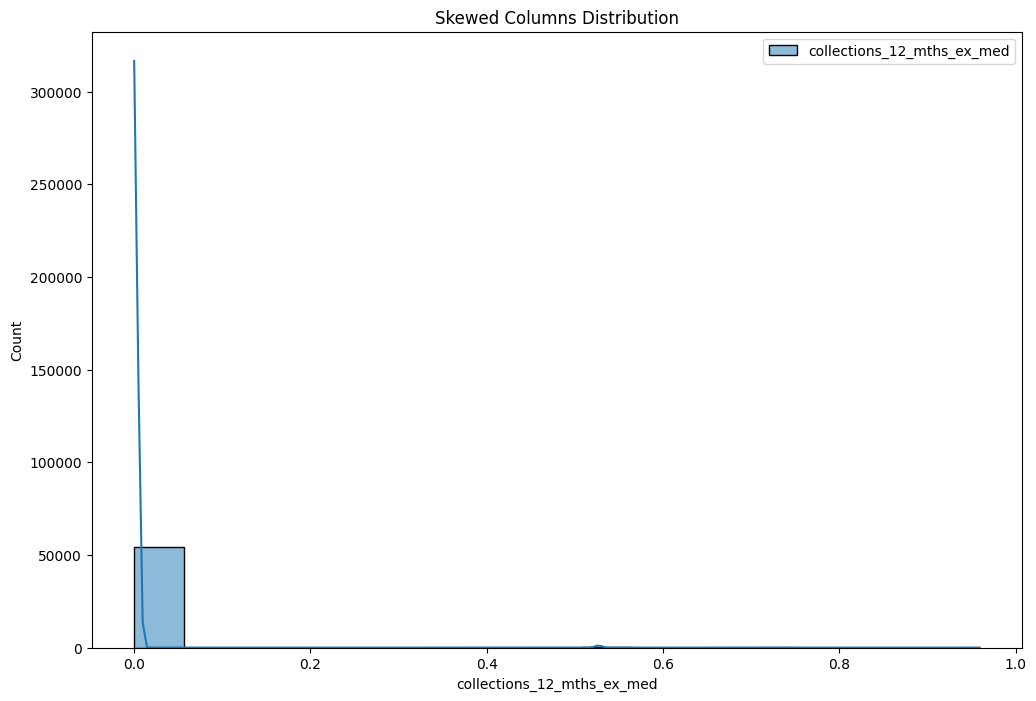

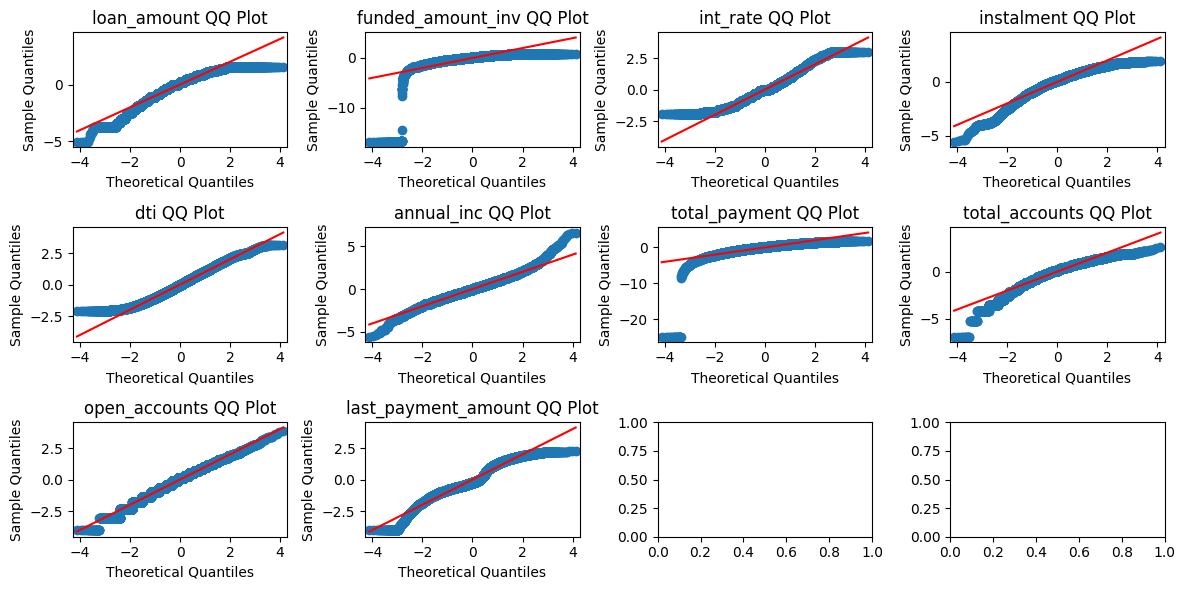

In [6]:
# Identify skewed columns
skewed_columns = identify_skewed_columns(df)

# Visualize skewness for each skewed column
for column in skewed_columns:
    # Create a DataFrame with the current column
    single_column_df = df[[column]]
    
    # Visualize skewness for the single column
    plt.figure(figsize=(0.2, 0.1))
    Plotter.visualize_skewness(single_column_df, [column])

    # Transform the single column and visualize again
    df_transformed = DataFrameTransform.transform_skewed_columns(df, [column])
    Plotter.visualize_skewness(df_transformed, [column])

# Define the numerical columns in your DataFrame
numerical_cols = ['loan_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'dti', 'annual_inc', 'total_payment', 'total_accounts', 'open_accounts', 'last_payment_amount']

# Generate Q-Q plots for numerical columns
outlier_indices = Plotter.qq_plot(df, numerical_cols)

# Continue with the rest of your code...
df_no_outliers = DataFrameTransform.remove_outliers_qqplot(df, numerical_cols)


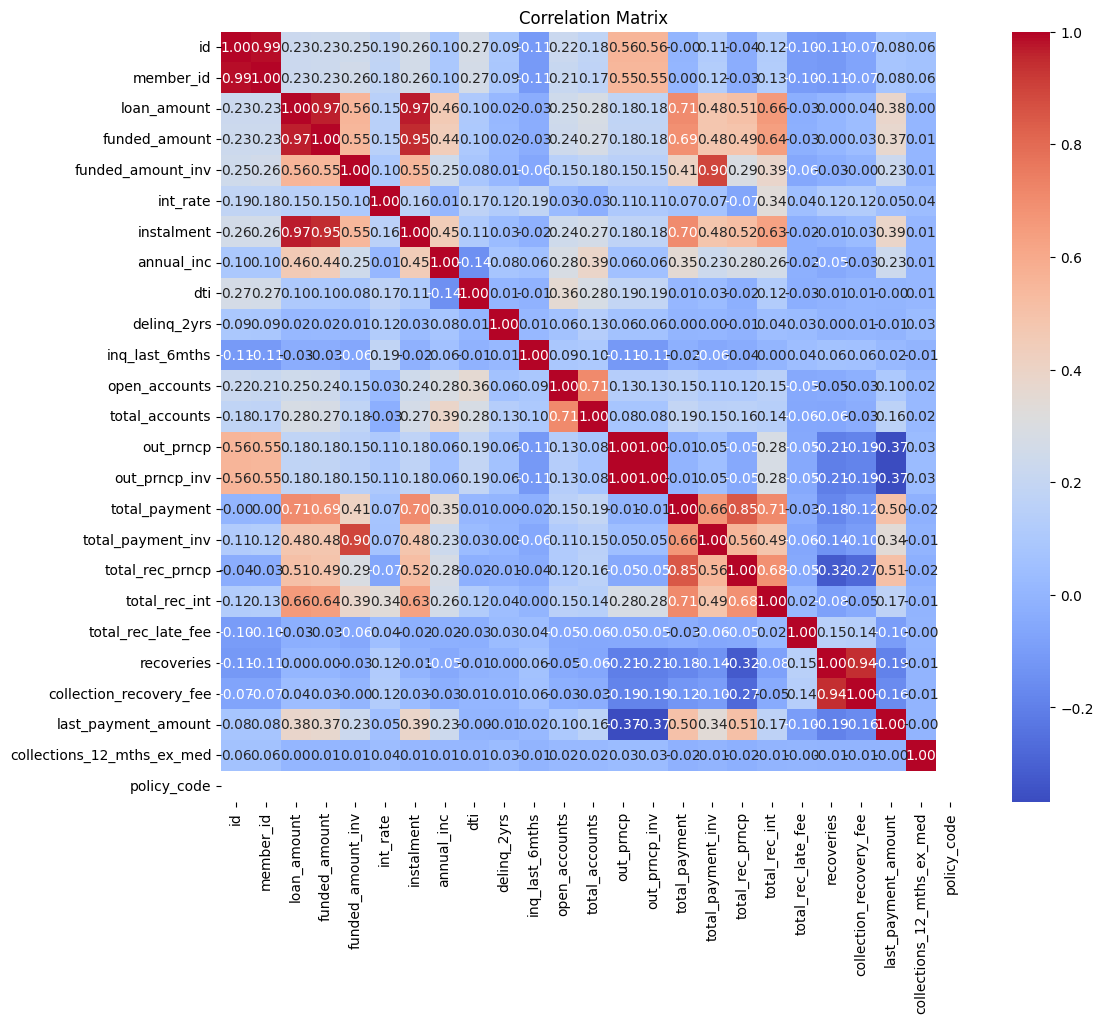

Highly Correlated Columns: {'collection_recovery_fee', 'total_payment', 'funded_amount', 'total_rec_prncp', 'out_prncp_inv', 'total_rec_int', 'total_payment_inv', 'instalment', 'total_accounts', 'member_id'}


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Select only numeric columns and compute the correlation matrix
numeric_columns = df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

# Step 2: Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Step 3: Identify highly correlated columns based on a correlation threshold
correlation_threshold = 0.7  # You can adjust this threshold as needed
highly_correlated_columns = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

# Step 4: Display the highly correlated columns
print("Highly Correlated Columns:", highly_correlated_columns)

# Step 5: Remove the highly correlated columns from the dataset
df_no_high_correlation = df.drop(columns=highly_correlated_columns)




Index(['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv',
       'term', 'int_rate', 'instalment', 'grade', 'sub_grade',
       'employment_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_date', 'loan_status', 'payment_plan',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line',
       'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp',
       'out_prncp_inv', 'total_payment', 'total_payment_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_payment_date', 'last_payment_amount',
       'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code',
       'application_type'],
      dtype='object')
The total funded amount by investors at that point in time is: 125687.63169153834
The total funded amount at that point in time is: 126277.56538995793
The total funded amount by investors at that point in time is: 125687.63169153834
The tot

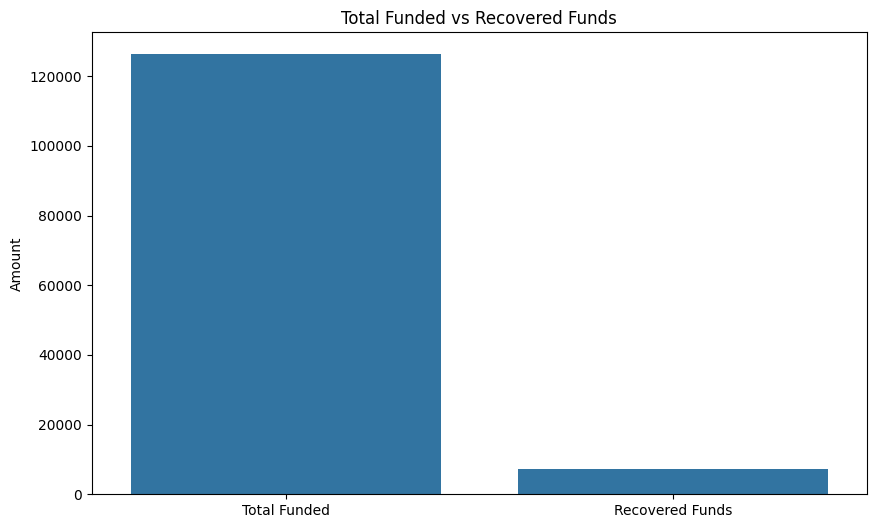

In [8]:
print(df.columns)

# Assuming df is your DataFrame
funded_amount_inv_at_specific_time = df['funded_amount_inv']

# If you want the total funded amount at that point in time
total_funded_at_specific_time = funded_amount_inv_at_specific_time.sum()

print(f"The total funded amount by investors at that point in time is: {total_funded_at_specific_time}")

# Assuming df is your DataFrame
funded_amount_at_specific_time = df['funded_amount']

# If you want the total funded amount at that point in time
total_funded_at_specific_time = funded_amount_at_specific_time.sum()

print(f"The total funded amount at that point in time is: {total_funded_at_specific_time}")

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
funded_amount_inv_at_specific_time = df['funded_amount_inv']

# If you want the total funded amount by investors at that point in time
total_funded_at_specific_time = funded_amount_inv_at_specific_time.sum()

print(f"The total funded amount by investors at that point in time is: {total_funded_at_specific_time}")

# Assuming df is your DataFrame
funded_amount_at_specific_time = df['funded_amount']

# If you want the total funded amount at that point in time
total_funded_at_specific_time = funded_amount_at_specific_time.sum()

print(f"The total funded amount at that point in time is: {total_funded_at_specific_time}")

# Calculate the percentage of recovered funds compared to the total amount funded
total_recovered_funds = df['recoveries'].sum()
percentage_recovered = (total_recovered_funds / total_funded_at_specific_time) * 100

print(f"The percentage of recovered funds compared to the total amount funded is: {percentage_recovered:.2f}%")

# Visualize the results
plt.figure(figsize=(10, 6))

# Plotting a bar chart for better visualization
sns.barplot(x=['Total Funded', 'Recovered Funds'], y=[total_funded_at_specific_time, total_recovered_funds])
plt.title('Total Funded vs Recovered Funds')
plt.ylabel('Amount')

plt.show()






The percentage of charged-off loans historically is: 10.27%
The total amount paid towards charged-off loans is: $12442.29


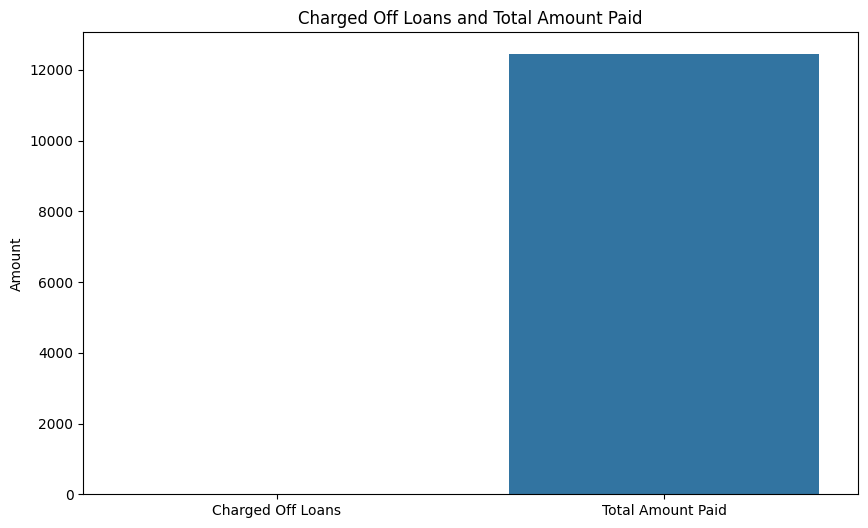

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for charged-off loans
charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Calculate the percentage of charged-off loans historically
percentage_charged_off = (charged_off_loans.shape[0] / df.shape[0]) * 100

print(f"The percentage of charged-off loans historically is: {percentage_charged_off:.2f}%")

# Calculate the total amount paid towards charged-off loans
total_amount_paid_charged_off = charged_off_loans['total_payment'].sum()

print(f"The total amount paid towards charged-off loans is: ${total_amount_paid_charged_off:.2f}")

# Visualize the results
plt.figure(figsize=(10, 6))

# Plotting a bar chart for better visualization
sns.barplot(x=['Charged Off Loans', 'Total Amount Paid'], y=[percentage_charged_off, total_amount_paid_charged_off])
plt.title('Charged Off Loans and Total Amount Paid')
plt.ylabel('Amount')

plt.show()


The projected loss of charged-off loans is: $11041.37


C:\Users\tariq\AppData\Local\Temp\ipykernel_197700\3463225826.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans.loc[:, 'remaining_principal'] = charged_off_loans['funded_amount'] - charged_off_loans['recoveries']
C:\Users\tariq\AppData\Local\Temp\ipykernel_197700\3463225826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans.loc[:, 'loss_in_revenue'] = charged_off_loans['remaining_principal'] - charged_off_loans['recoveries']


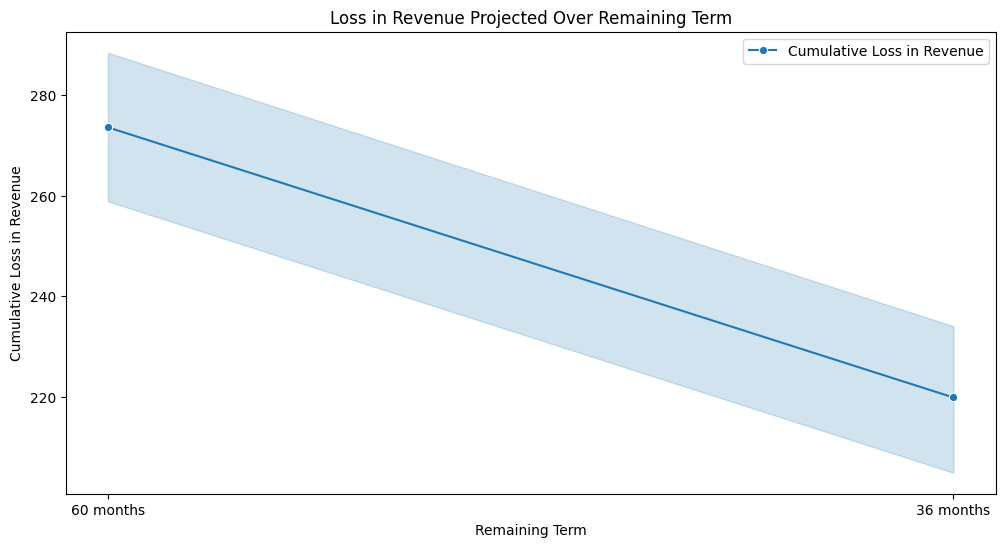

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

projected_loss = charged_off_loans['recoveries'].sum() + charged_off_loans['collection_recovery_fee'].sum()

print(f"The projected loss of charged-off loans is: ${projected_loss:.2f}")

charged_off_loans.loc[:, 'remaining_principal'] = charged_off_loans['funded_amount'] - charged_off_loans['recoveries']
charged_off_loans.loc[:, 'loss_in_revenue'] = charged_off_loans['remaining_principal'] - charged_off_loans['recoveries']

plt.figure(figsize=(12, 6))
sns.lineplot(x=charged_off_loans['term'], y=charged_off_loans['loss_in_revenue'].cumsum(), label='Cumulative Loss in Revenue', marker='o')
plt.title('Loss in Revenue Projected Over Remaining Term')
plt.xlabel('Remaining Term')
plt.ylabel('Cumulative Loss in Revenue')
plt.legend()
plt.show()







In [11]:

late_payments = df[df['loan_status'] == 'Late']

percentage_late_customers = (len(late_payments) / len(df)) * 100

total_late_customers = len(late_payments)

estimated_loss = late_payments['recoveries'].sum()

print(f"Percentage of late customers: {percentage_late_customers:.2f}%")
print(f"Total late customers: {total_late_customers}")
print(f"Estimated loss if charged off: ${estimated_loss:.2f}")



Percentage of late customers: 0.00%
Total late customers: 0
Estimated loss if charged off: $0.00
